#Data Setup

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, silhouette_score
)

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")
print(f"Random State: {RANDOM_STATE}")

All libraries imported successfully!
Random State: 42


In [2]:
# Install ucimlrepo
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch dataset from UCI Repository (Dataset ID = 891)
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Extract data
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Combine into one dataframe
df = pd.concat([X, y], axis=1)

# Display basic dataset info
print("=" * 70)
print("CDC DIABETES HEALTH INDICATORS DATASET LOADED SUCCESSFULLY")
print("=" * 70)
print(f"Features Shape: {X.shape}")
print(f"Target Shape:   {y.shape}")
print(f"Full Dataset Shape: {df.shape}")
print("\nColumns:")
print(df.columns.tolist())

# -------------------------------------------------------------
# Metadata & variables
# -------------------------------------------------------------
print("\n" + "=" * 70)
print("METADATA")
print("=" * 70)
print(cdc_diabetes_health_indicators.metadata)

print("\n" + "=" * 70)
print("VARIABLE INFORMATION")
print("=" * 70)
print(cdc_diabetes_health_indicators.variables)

# Show first few rows
print("\n" + "=" * 70)
print("FIRST 5 ROWS")
print("=" * 70)
df.head()

CDC DIABETES HEALTH INDICATORS DATASET LOADED SUCCESSFULLY
Features Shape: (253680, 21)
Target Shape:   (253680, 1)
Full Dataset Shape: (253680, 22)

Columns:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']

METADATA
{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classificatio

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [3]:
# Column information
print("=" * 60)
print("COLUMN INFORMATION")
print("=" * 60)
print(f"Total Columns: {len(df.columns)}\n")
print("Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

COLUMN INFORMATION
Total Columns: 22

Column Names:
 1. HighBP
 2. HighChol
 3. CholCheck
 4. BMI
 5. Smoker
 6. Stroke
 7. HeartDiseaseorAttack
 8. PhysActivity
 9. Fruits
10. Veggies
11. HvyAlcoholConsump
12. AnyHealthcare
13. NoDocbcCost
14. GenHlth
15. MentHlth
16. PhysHlth
17. DiffWalk
18. Sex
19. Age
20. Education
21. Income
22. Diabetes_binary


In [4]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing_values = df.isnull().sum()
print(f"Total Missing Values: {missing_values.sum()}")

if missing_values.sum() == 0:
    print(" No missing values found! Dataset is complete.")
else:
    print("\nMissing values by column:")
    print(missing_values[missing_values > 0])

# Check data types
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes.value_counts())

# Check for duplicates
print("\n" + "=" * 60)
print("DUPLICATE ROWS CHECK")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates:,}")
if duplicates > 0:
    print(f"Percentage: {duplicates/len(df)*100:.2f}%")

MISSING VALUES CHECK
Total Missing Values: 0
 No missing values found! Dataset is complete.

DATA TYPES
int64    22
Name: count, dtype: int64

DUPLICATE ROWS CHECK
Number of Duplicate Rows: 24,206
Percentage: 9.54%


TARGET VARIABLE DISTRIBUTION

Class Distribution:
  Class 0 (No Diabetes): 218,334 (86.07%)
  Class 1 (Diabetes):    35,346 (13.93%)

  Imbalance Ratio: 6.18:1
   (Non-diabetic to Diabetic ratio)


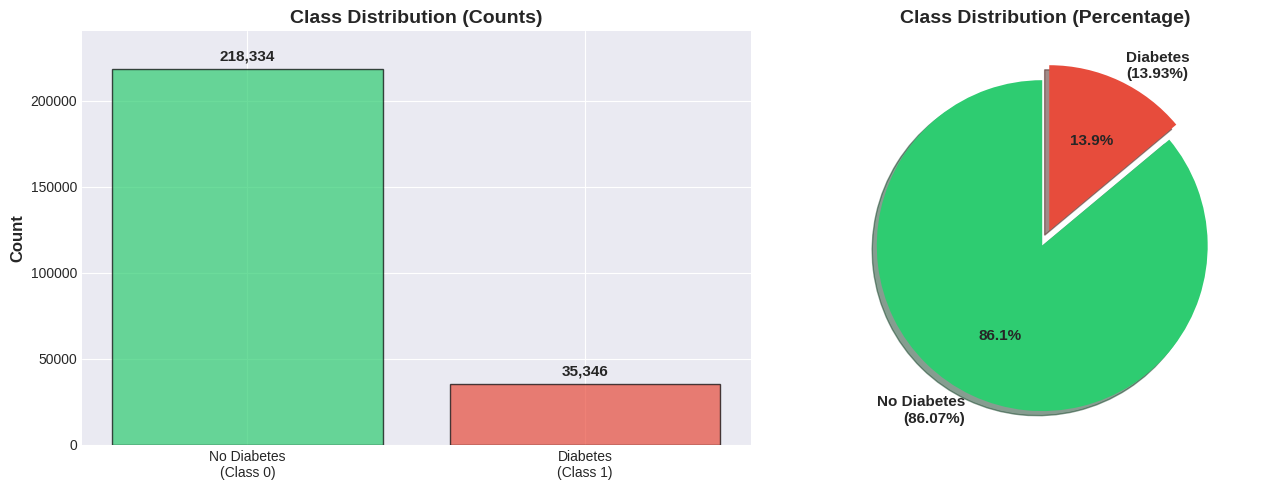

In [5]:
# Analyze target variable distribution
print("=" * 60)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 60)

target_counts = df['Diabetes_binary'].value_counts()
target_percentages = df['Diabetes_binary'].value_counts(normalize=True) * 100

print("\nClass Distribution:")
print(f"  Class 0 (No Diabetes): {target_counts[0]:,} ({target_percentages[0]:.2f}%)")
print(f"  Class 1 (Diabetes):    {target_counts[1]:,} ({target_percentages[1]:.2f}%)")

imbalance_ratio = target_counts[0] / target_counts[1]
print(f"\n  Imbalance Ratio: {imbalance_ratio:.2f}:1")
print("   (Non-diabetic to Diabetic ratio)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['No Diabetes\n(Class 0)', 'Diabetes\n(Class 1)'],
            target_counts.values,
            color=['#2ecc71', '#e74c3c'],
            alpha=0.7,
            edgecolor='black')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Class Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(target_counts.values) * 1.1)
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 5000, f'{v:,}', ha='center', fontweight='bold', fontsize=11)

# Pie chart
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
axes[1].pie(target_counts.values,
            labels=['No Diabetes\n(86.07%)', 'Diabetes\n(13.93%)'],
            autopct='%1.1f%%',
            colors=colors,
            explode=explode,
            shadow=True,
            startangle=90,
            textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Descriptive statistics
print("=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
df.describe().T

DESCRIPTIVE STATISTICS


,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [7]:
# Define feature sets based on project requirements

# Tier 1: Core Features (Top 5 predictors)
tier1_features = ['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age']

# Tier 2: High-Value Features
tier2_features = ['DiffWalk', 'PhysHlth', 'HeartDiseaseorAttack', 'Income', 'PhysActivity']

# Tier 3: Supplementary Features
tier3_features = ['Education', 'MentHlth', 'Stroke', 'Smoker', 'CholCheck', 'Sex']

# === GRADIENT BOOSTING FEATURES (12-15 features) ===
# Using Tier 1 + Tier 2 + some Tier 3
gb_features = tier1_features + tier2_features + ['Education', 'MentHlth']

print("=" * 60)
print("GRADIENT BOOSTING FEATURES (12 features)")
print("=" * 60)
for i, feat in enumerate(gb_features, 1):
    print(f"{i:2d}. {feat}")

# === K-MEANS CLUSTERING FEATURES (Behavioral/Lifestyle) ===
# Focus on modifiable behaviors and lifestyle factors
kmeans_features = [
    'BMI', 'GenHlth', 'PhysActivity', 'Age',
    'PhysHlth', 'MentHlth', 'Income', 'Education',
    'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump'
]

print("\n" + "=" * 60)
print("K-MEANS CLUSTERING FEATURES (12 features)")
print("=" * 60)
print("Focus: Behavioral and lifestyle factors for segmentation\n")
for i, feat in enumerate(kmeans_features, 1):
    print(f"{i:2d}. {feat}")

# Store target variable
target = 'Diabetes_binary'

GRADIENT BOOSTING FEATURES (12 features)
 1. GenHlth
 2. HighBP
 3. BMI
 4. HighChol
 5. Age
 6. DiffWalk
 7. PhysHlth
 8. HeartDiseaseorAttack
 9. Income
10. PhysActivity
11. Education
12. MentHlth

K-MEANS CLUSTERING FEATURES (12 features)
Focus: Behavioral and lifestyle factors for segmentation

 1. BMI
 2. GenHlth
 3. PhysActivity
 4. Age
 5. PhysHlth
 6. MentHlth
 7. Income
 8. Education
 9. Fruits
10. Veggies
11. Smoker
12. HvyAlcoholConsump


In [8]:
# Prepare features and target for Gradient Boosting
X_gb = df[gb_features].copy()
y = df[target].copy()

print("=" * 60)
print("GRADIENT BOOSTING DATA PREPARATION")
print("=" * 60)
print(f"Feature Matrix Shape: {X_gb.shape}")
print(f"Target Vector Shape: {y.shape}")
print(f"\nFeature Data Types:")
print(X_gb.dtypes)

# Check for any missing values in selected features
print(f"\nMissing Values in GB Features: {X_gb.isnull().sum().sum()}")

GRADIENT BOOSTING DATA PREPARATION
Feature Matrix Shape: (253680, 12)
Target Vector Shape: (253680,)

Feature Data Types:
GenHlth                 int64
HighBP                  int64
BMI                     int64
HighChol                int64
Age                     int64
DiffWalk                int64
PhysHlth                int64
HeartDiseaseorAttack    int64
Income                  int64
PhysActivity            int64
Education               int64
MentHlth                int64
dtype: object

Missing Values in GB Features: 0


In [9]:
# Stratified train-test split
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(
    X_gb, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("=" * 60)
print("TRAIN-TEST SPLIT (GRADIENT BOOSTING)")
print("=" * 60)
print(f"Training Set Size:   {X_train_gb.shape[0]:,} samples ({X_train_gb.shape[0]/len(df)*100:.1f}%)")
print(f"Test Set Size:       {X_test_gb.shape[0]:,} samples ({X_test_gb.shape[0]/len(df)*100:.1f}%)")
print(f"Number of Features:  {X_train_gb.shape[1]}")

# Verify stratification
print("\n" + "=" * 60)
print("CLASS DISTRIBUTION VERIFICATION")
print("=" * 60)

train_dist = y_train_gb.value_counts(normalize=True) * 100
test_dist = y_test_gb.value_counts(normalize=True) * 100
original_dist = y.value_counts(normalize=True) * 100

comparison_df = pd.DataFrame({
    'Original': original_dist,
    'Training': train_dist,
    'Test': test_dist
})
comparison_df.index = ['No Diabetes (0)', 'Diabetes (1)']
print(comparison_df.round(2))
print("\n Stratification successful - distributions match!")

TRAIN-TEST SPLIT (GRADIENT BOOSTING)
Training Set Size:   202,944 samples (80.0%)
Test Set Size:       50,736 samples (20.0%)
Number of Features:  12

CLASS DISTRIBUTION VERIFICATION
                 Original  Training   Test
No Diabetes (0)     86.07     86.07  86.07
Diabetes (1)        13.93     13.93  13.93

 Stratification successful - distributions match!


In [10]:
# Prepare features for K-Means
X_kmeans = df[kmeans_features].copy()

print("=" * 60)
print("K-MEANS DATA PREPARATION")
print("=" * 60)
print(f"Feature Matrix Shape: {X_kmeans.shape}")
print(f"\nFeature Statistics (Before Scaling):")
print(X_kmeans.describe().T[['mean', 'std', 'min', 'max']])

K-MEANS DATA PREPARATION
Feature Matrix Shape: (253680, 12)

Feature Statistics (Before Scaling):
                        mean       std   min   max
BMI                28.382364  6.608694  12.0  98.0
GenHlth             2.511392  1.068477   1.0   5.0
PhysActivity        0.756544  0.429169   0.0   1.0
Age                 8.032119  3.054220   1.0  13.0
PhysHlth            4.242081  8.717951   0.0  30.0
MentHlth            3.184772  7.412847   0.0  30.0
Income              6.053875  2.071148   1.0   8.0
Education           5.050434  0.985774   1.0   6.0
Fruits              0.634256  0.481639   0.0   1.0
Veggies             0.811420  0.391175   0.0   1.0
Smoker              0.443169  0.496761   0.0   1.0
HvyAlcoholConsump   0.056197  0.230302   0.0   1.0


In [11]:
# Initialize StandardScaler
scaler_kmeans = StandardScaler()

# Fit and transform the data
X_kmeans_scaled = scaler_kmeans.fit_transform(X_kmeans)

# Convert back to DataFrame for easier handling
X_kmeans_scaled_df = pd.DataFrame(
    X_kmeans_scaled,
    columns=kmeans_features,
    index=X_kmeans.index
)

print("=" * 60)
print("FEATURE SCALING COMPLETE (StandardScaler)")
print("=" * 60)
print(f"Scaled Matrix Shape: {X_kmeans_scaled_df.shape}")
print(f"\nFeature Statistics (After Scaling):")
print(X_kmeans_scaled_df.describe().T[['mean', 'std', 'min', 'max']])

print("\n Features now have mean ≈ 0 and std ≈ 1")
print(" This is REQUIRED for K-Means clustering!")

FEATURE SCALING COMPLETE (StandardScaler)
Scaled Matrix Shape: (253680, 12)

Feature Statistics (After Scaling):
                           mean       std       min        max
BMI               -2.505162e-16  1.000002 -2.478916  10.534271
GenHlth            1.711935e-16  1.000002 -1.414532   2.329121
PhysActivity       5.377807e-17  1.000002 -1.762814   0.567275
Age                6.767074e-17  1.000002 -2.302431   1.626566
PhysHlth           3.450759e-17  1.000002 -0.486592   2.954590
MentHlth           8.963011e-18  1.000002 -0.429630   3.617407
Income             7.170409e-17  1.000002 -2.440138   0.939638
Education         -8.514861e-17  1.000002 -4.108894   0.963272
Fruits             5.601882e-17  1.000002 -1.316872   0.759375
Veggies           -2.487236e-17  1.000002 -2.074316   0.482087
Smoker             2.688903e-17  1.000002 -0.892119   1.120927
HvyAlcoholConsump  9.299124e-17  1.000002 -0.244014   4.098123

 Features now have mean ≈ 0 and std ≈ 1
 This is REQUIRED for K-Mea

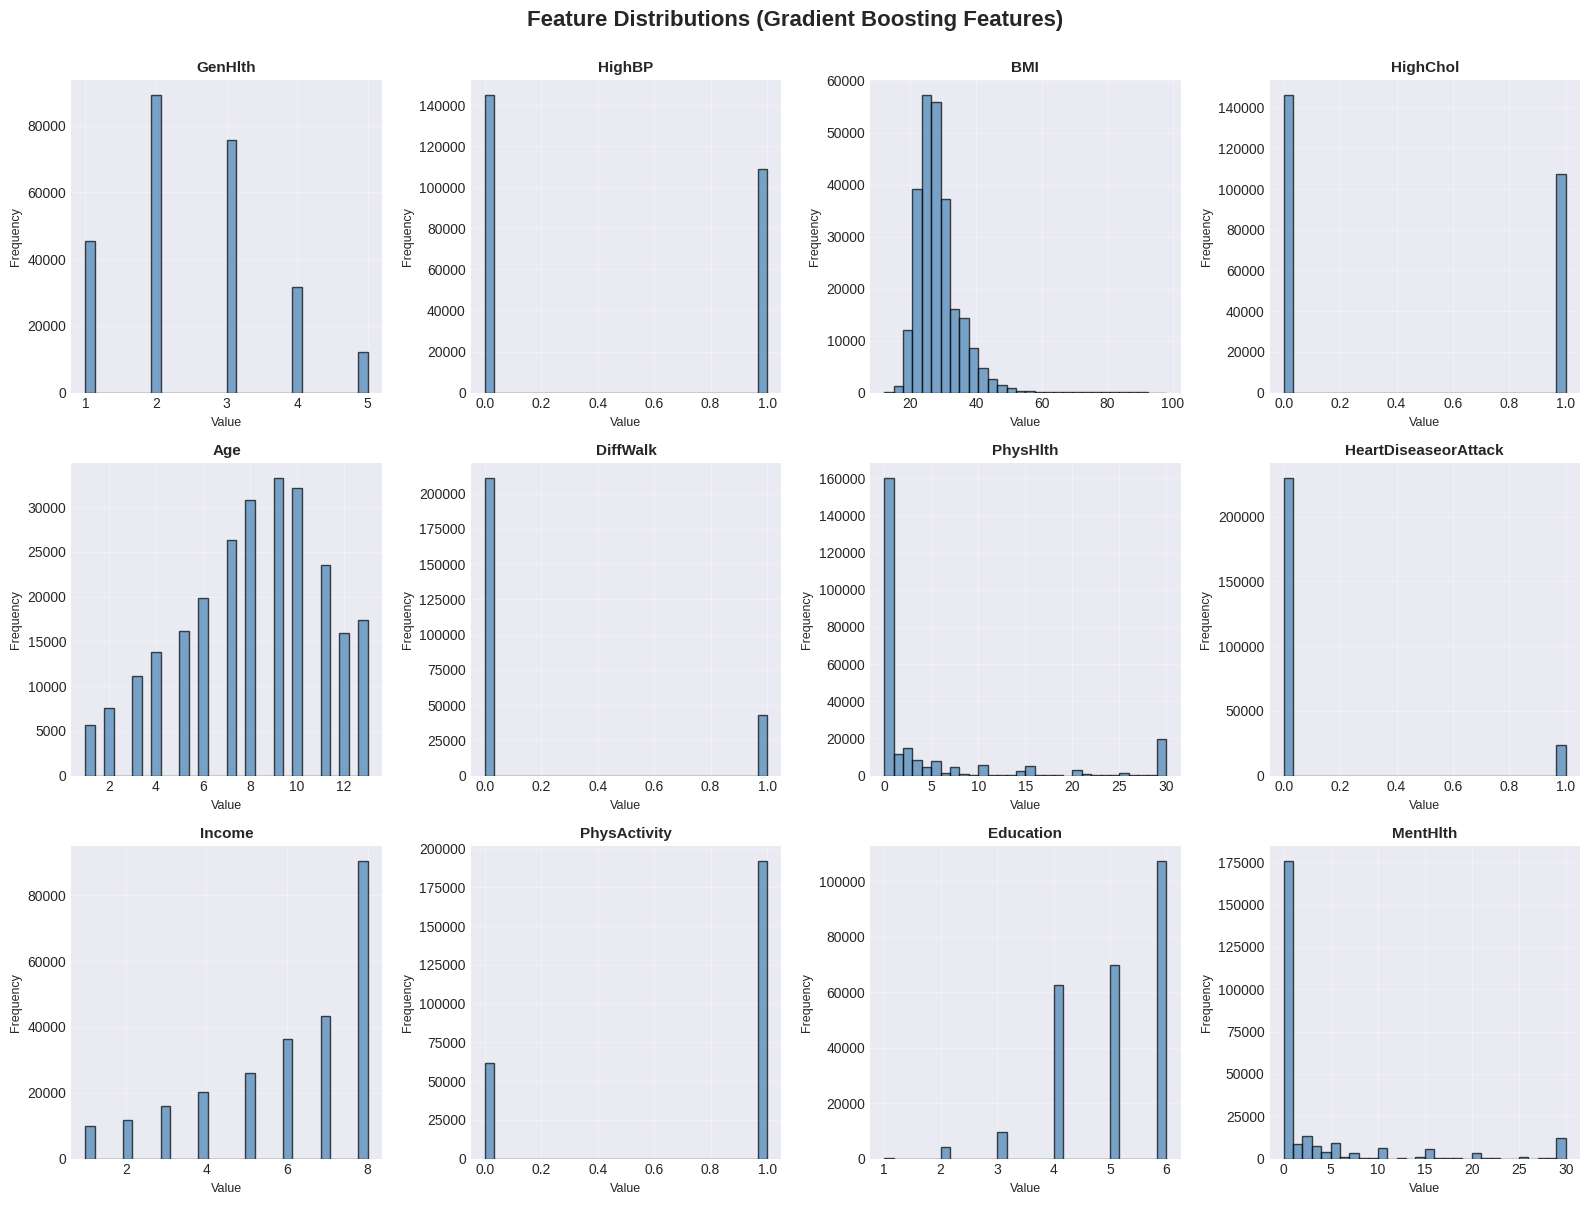

In [12]:
# Visualize distributions of key features for Gradient Boosting
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(gb_features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Distributions (Gradient Boosting Features)',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


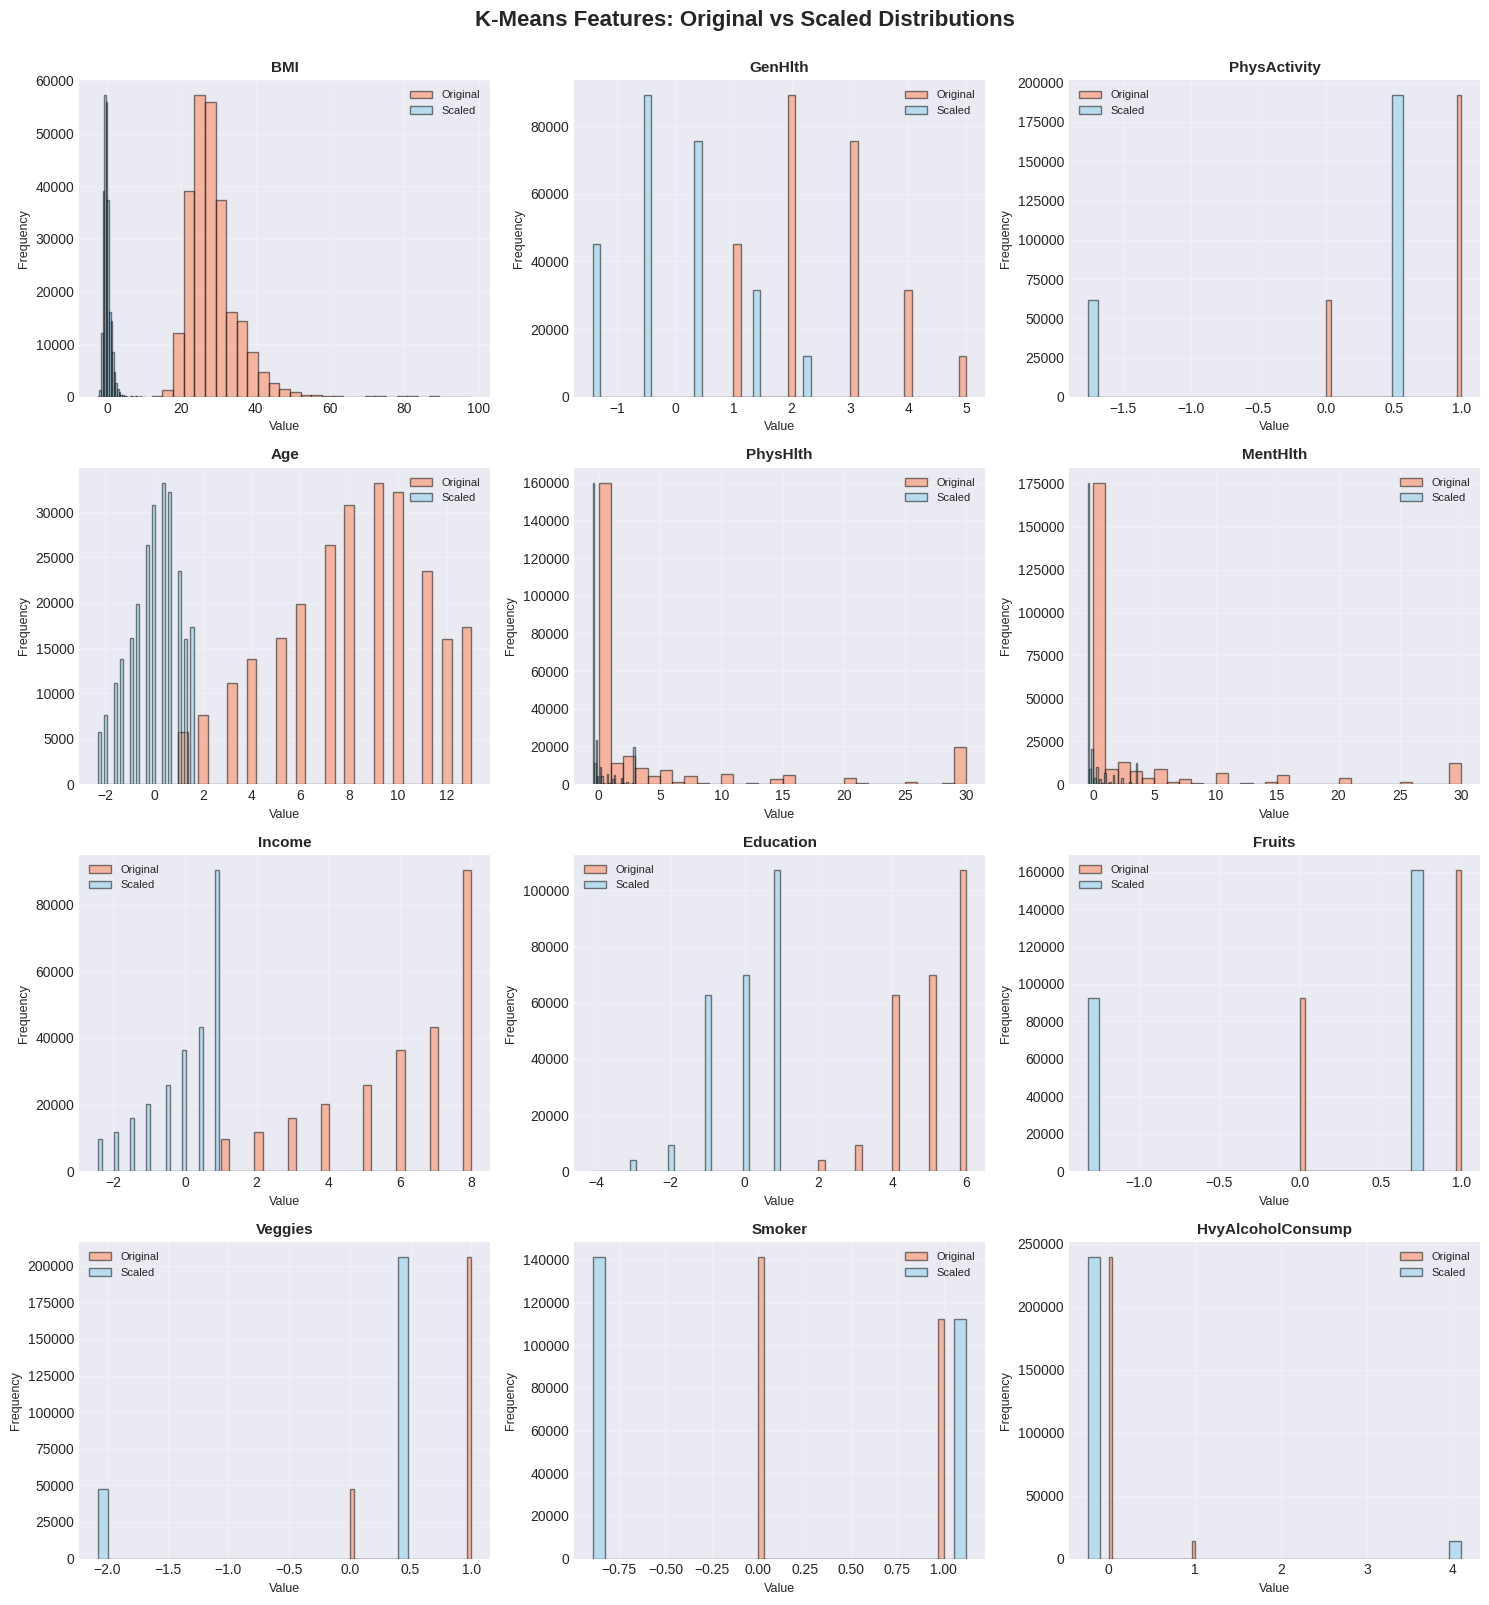

In [13]:
# Visualize distributions of K-Means features (before and after scaling)
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.ravel()

for idx, feature in enumerate(kmeans_features):
    # Original distribution
    axes[idx].hist(X_kmeans[feature], bins=30, alpha=0.5,
                   label='Original', color='coral', edgecolor='black')
    # Scaled distribution
    axes[idx].hist(X_kmeans_scaled_df[feature], bins=30, alpha=0.5,
                   label='Scaled', color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('K-Means Features: Original vs Scaled Distributions',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

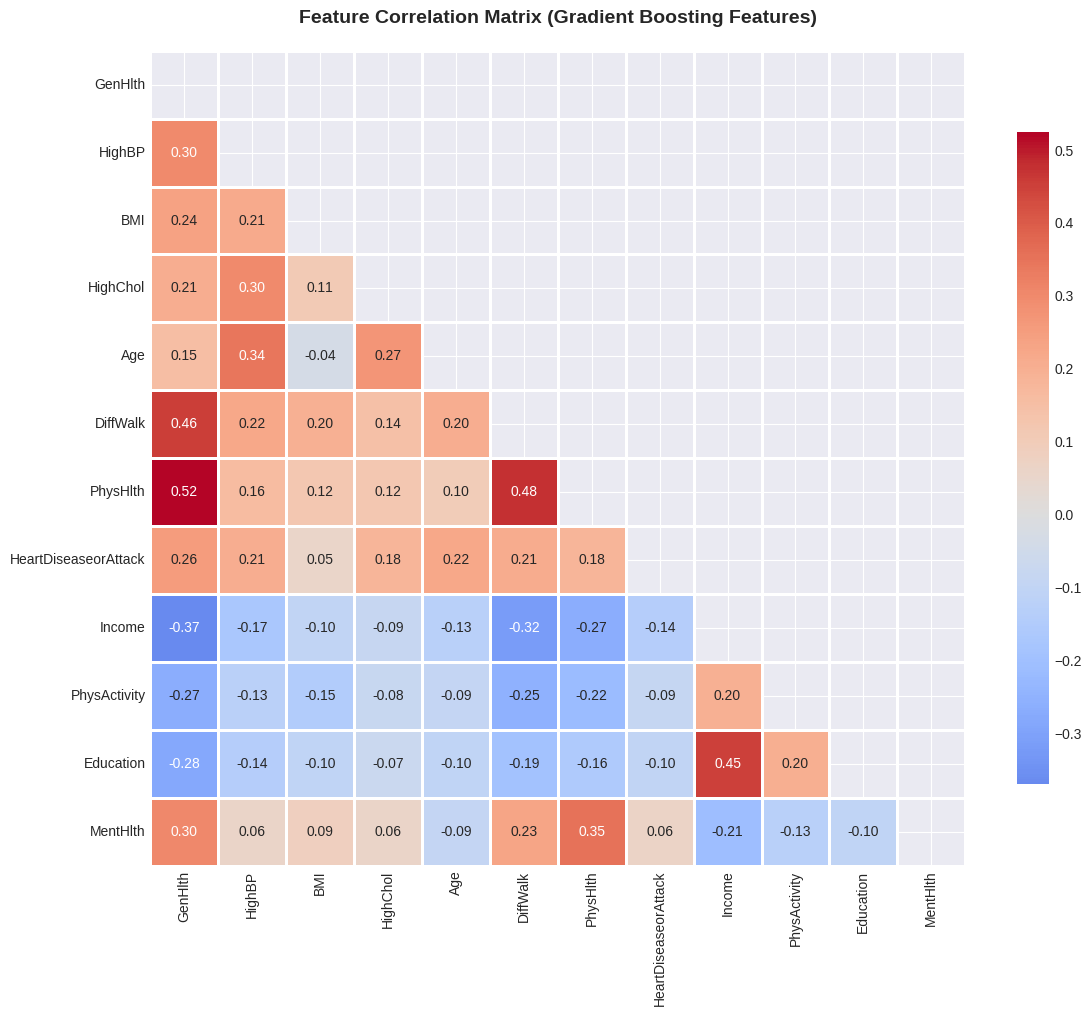


HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.5)
  GenHlth              ↔ PhysHlth            : r = +0.524


In [14]:
# Correlation matrix for Gradient Boosting features
correlation_matrix_gb = X_gb.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix_gb, dtype=bool))
sns.heatmap(correlation_matrix_gb,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Gradient Boosting Features)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


# Find highly correlated pairs
print("\n" + "=" * 60)
print("HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.5)")
print("=" * 60)

high_corr_pairs = []
for i in range(len(correlation_matrix_gb.columns)):
    for j in range(i+1, len(correlation_matrix_gb.columns)):
        if abs(correlation_matrix_gb.iloc[i, j]) > 0.5:
            high_corr_pairs.append((
                correlation_matrix_gb.columns[i],
                correlation_matrix_gb.columns[j],
                correlation_matrix_gb.iloc[i, j]
            ))

if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f"  {feat1:20s} ↔ {feat2:20s}: r = {corr:+.3f}")
else:
    print("  No highly correlated pairs found (excellent for modeling!)")

In [15]:
# Save prepared datasets for next notebooks
import pickle

# Create dictionary to store all prepared data
prepared_data = {
    # Gradient Boosting data
    'X_train_gb': X_train_gb,
    'X_test_gb': X_test_gb,
    'y_train_gb': y_train_gb,
    'y_test_gb': y_test_gb,
    'gb_features': gb_features,

    # K-Means data
    'X_kmeans_scaled': X_kmeans_scaled_df,
    'X_kmeans_original': X_kmeans,
    'kmeans_features': kmeans_features,
    'scaler_kmeans': scaler_kmeans,

    # Full dataset reference
    'y_full': y,
    'random_state': RANDOM_STATE
}

# Save to pickle file
output_file_path = '/content/sample_data/prepared_data.pkl'
with open(output_file_path, 'wb') as f:
    pickle.dump(prepared_data, f)

print("=" * 60)
print("DATA PREPARATION COMPLETE")
print("=" * 60)
print(f" All data saved to '{output_file_path}'")
print("\nSaved components:")
for key in prepared_data.keys():
    if isinstance(prepared_data[key], (pd.DataFrame, pd.Series)):
        print(f"  - {key}: {prepared_data[key].shape}")
    elif isinstance(prepared_data[key], list):
        print(f"  - {key}: {len(prepared_data[key])} items")
    else:
        print(f"  - {key}: {type(prepared_data[key]).__name__}")

DATA PREPARATION COMPLETE
 All data saved to '/content/sample_data/prepared_data.pkl'

Saved components:
  - X_train_gb: (202944, 12)
  - X_test_gb: (50736, 12)
  - y_train_gb: (202944,)
  - y_test_gb: (50736,)
  - gb_features: 12 items
  - X_kmeans_scaled: (253680, 12)
  - X_kmeans_original: (253680, 12)
  - kmeans_features: 12 items
  - scaler_kmeans: StandardScaler
  - y_full: (253680,)
  - random_state: int


#Gradient_Boosting

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, fbeta_score
)
from imblearn.over_sampling import SMOTE

# Load prepared data from Part 1
with open('/content/sample_data/prepared_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract Gradient Boosting data
X_train = data['X_train_gb']
X_test = data['X_test_gb']
y_train = data['y_train_gb']
y_test = data['y_test_gb']
gb_features = data['gb_features']
RANDOM_STATE = data['random_state']

print("=" * 60)
print("DATA LOADED SUCCESSFULLY")
print("=" * 60)
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Test samples: {X_test.shape[0]:,}")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nFeatures: {gb_features}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"Imbalance ratio: {(y_train == 0).sum() / (y_train == 1).sum():.2f}:1")

DATA LOADED SUCCESSFULLY
Training samples: 202,944
Test samples: 50,736
Number of features: 12

Features: ['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'PhysHlth', 'HeartDiseaseorAttack', 'Income', 'PhysActivity', 'Education', 'MentHlth']

Class distribution in training set:
Diabetes_binary
0    174667
1     28277
Name: count, dtype: int64
Imbalance ratio: 6.18:1


In [17]:
# Baseline Gradient Boosting Model with baseline parameters
print("=" * 60)
print("BASELINE MODEL - DEFAULT PARAMETERS")
print("=" * 60)

# Create baseline model with default parameters
gb_baseline = GradientBoostingClassifier(
    random_state=RANDOM_STATE,
    verbose=0
)

# Train the model
print("Training baseline model...")
gb_baseline.fit(X_train, y_train)
print("Training complete")

# Make predictions
y_pred_baseline = gb_baseline.predict(X_test)
y_pred_proba_baseline = gb_baseline.predict_proba(X_test)[:, 1]

# Evaluate baseline model
print("\n" + "=" * 60)
print("BASELINE MODEL PERFORMANCE")
print("=" * 60)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
f2_baseline = fbeta_score(y_test, y_pred_baseline, beta=2)
roc_auc_baseline = roc_auc_score(y_test, y_pred_proba_baseline)

print(f"Accuracy:  {accuracy_baseline:.4f}")
print(f"Precision: {precision_baseline:.4f}")
print(f"Recall:    {recall_baseline:.4f}  (Priority metric for healthcare)")
print(f"F1-Score:  {f1_baseline:.4f}")
print(f"F2-Score:  {f2_baseline:.4f} (Emphasizes recall)")
print(f"ROC-AUC:   {roc_auc_baseline:.4f}")

print("\n" + "Classification Report:")
print(classification_report(y_test, y_pred_baseline,
                          target_names=['No Diabetes', 'Diabetes']))

BASELINE MODEL - DEFAULT PARAMETERS
Training baseline model...
Training complete

BASELINE MODEL PERFORMANCE
Accuracy:  0.8645
Precision: 0.5469
Recall:    0.1608  (Priority metric for healthcare)
F1-Score:  0.2486
F2-Score:  0.1873 (Emphasizes recall)
ROC-AUC:   0.8227

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      0.98      0.93     43667
    Diabetes       0.55      0.16      0.25      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



In [18]:
# Class Weighting
print("=" * 60)
print("MODEL WITH CLASS WEIGHTING")
print("=" * 60)

# Calculate class weights
class_weights = {0: 1, 1: (y_train == 0).sum() / (y_train == 1).sum()}
print(f"Class weights: {class_weights}")
print(f"Class 1 (Diabetes) is weighted {class_weights[1]:.2f}× more than Class 0\n")

# Train model with class weighting
# GradientBoostingClassifier doesn't have class_weight parameter / we will use sample_weight instead
sample_weights = np.where(y_train == 1, class_weights[1], class_weights[0])

gb_weighted = GradientBoostingClassifier(
    random_state=RANDOM_STATE,
    verbose=0
)

print("Training model with sample weighting...")
gb_weighted.fit(X_train, y_train, sample_weight=sample_weights)
print("Training complete")

# Make predictions
y_pred_weighted = gb_weighted.predict(X_test)
y_pred_proba_weighted = gb_weighted.predict_proba(X_test)[:, 1]

# Evaluate
print("\n" + "=" * 60)
print("WEIGHTED MODEL PERFORMANCE")
print("=" * 60)

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)
f2_weighted = fbeta_score(y_test, y_pred_weighted, beta=2)
roc_auc_weighted = roc_auc_score(y_test, y_pred_proba_weighted)

print(f"Accuracy:  {accuracy_weighted:.4f}")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall:    {recall_weighted:.4f} ")
print(f"F1-Score:  {f1_weighted:.4f}")
print(f"F2-Score:  {f2_weighted:.4f}")
print(f"ROC-AUC:   {roc_auc_weighted:.4f}")

print(f"\n Recall improvement: {recall_weighted - recall_baseline:+.4f}")

MODEL WITH CLASS WEIGHTING
Class weights: {0: 1, 1: np.float64(6.176998974431517)}
Class 1 (Diabetes) is weighted 6.18× more than Class 0

Training model with sample weighting...
Training complete

WEIGHTED MODEL PERFORMANCE
Accuracy:  0.7187
Precision: 0.3033
Recall:    0.7855 
F1-Score:  0.4376
F2-Score:  0.5960
ROC-AUC:   0.8222

 Recall improvement: +0.6247


In [19]:
# SMOTE (Synthetic Minority Over-sampling)
print("=" * 60)
print("APPLYING SMOTE")
print("=" * 60)

# Apply SMOTE with moderate sampling
smote = SMOTE(sampling_strategy=0.5, random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original training set:")
print(f"  Class 0: {(y_train == 0).sum():,}")
print(f"  Class 1: {(y_train == 1).sum():,}")
print(f"  Ratio: {(y_train == 0).sum() / (y_train == 1).sum():.2f}:1")

print(f"\nAfter SMOTE (sampling_strategy=0.5):")
print(f"  Class 0: {(y_train_smote == 0).sum():,}")
print(f"  Class 1: {(y_train_smote == 1).sum():,}")
print(f"  Ratio: {(y_train_smote == 0).sum() / (y_train_smote == 1).sum():.2f}:1")

# Train model with SMOTE data
gb_smote = GradientBoostingClassifier(
    random_state=RANDOM_STATE,
    verbose=0
)

print("\nTraining model with SMOTE data...")
gb_smote.fit(X_train_smote, y_train_smote)
print("Training complete")

# Make predictions
y_pred_smote = gb_smote.predict(X_test)
y_pred_proba_smote = gb_smote.predict_proba(X_test)[:, 1]

# Evaluate
print("\n" + "=" * 60)
print("SMOTE MODEL PERFORMANCE")
print("=" * 60)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
f2_smote = fbeta_score(y_test, y_pred_smote, beta=2)
roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

print(f"Accuracy:  {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall:    {recall_smote:.4f} ")
print(f"F1-Score:  {f1_smote:.4f}")
print(f"F2-Score:  {f2_smote:.4f}")
print(f"ROC-AUC:   {roc_auc_smote:.4f}")

print(f"\n Recall improvement over baseline: {recall_smote - recall_baseline:+.4f}")

APPLYING SMOTE
Original training set:
  Class 0: 174,667
  Class 1: 28,277
  Ratio: 6.18:1

After SMOTE (sampling_strategy=0.5):
  Class 0: 174,667
  Class 1: 87,333
  Ratio: 2.00:1

Training model with SMOTE data...
Training complete

SMOTE MODEL PERFORMANCE
Accuracy:  0.8095
Precision: 0.3733
Recall:    0.5411 
F1-Score:  0.4418
F2-Score:  0.4965
ROC-AUC:   0.8103

 Recall improvement over baseline: +0.3803


IMBALANCE HANDLING STRATEGY COMPARISON
          Model  Accuracy  Precision   Recall  F1-Score  F2-Score  ROC-AUC
       Baseline  0.864514   0.546898 0.160843  0.248579  0.187284 0.822700
Class Weighting  0.718720   0.303310 0.785543  0.437640  0.596020 0.822241
          SMOTE  0.809484   0.373280 0.541095  0.441788  0.496457 0.810332

 Best model for recall: Class Weighting
   Recall: 0.7855


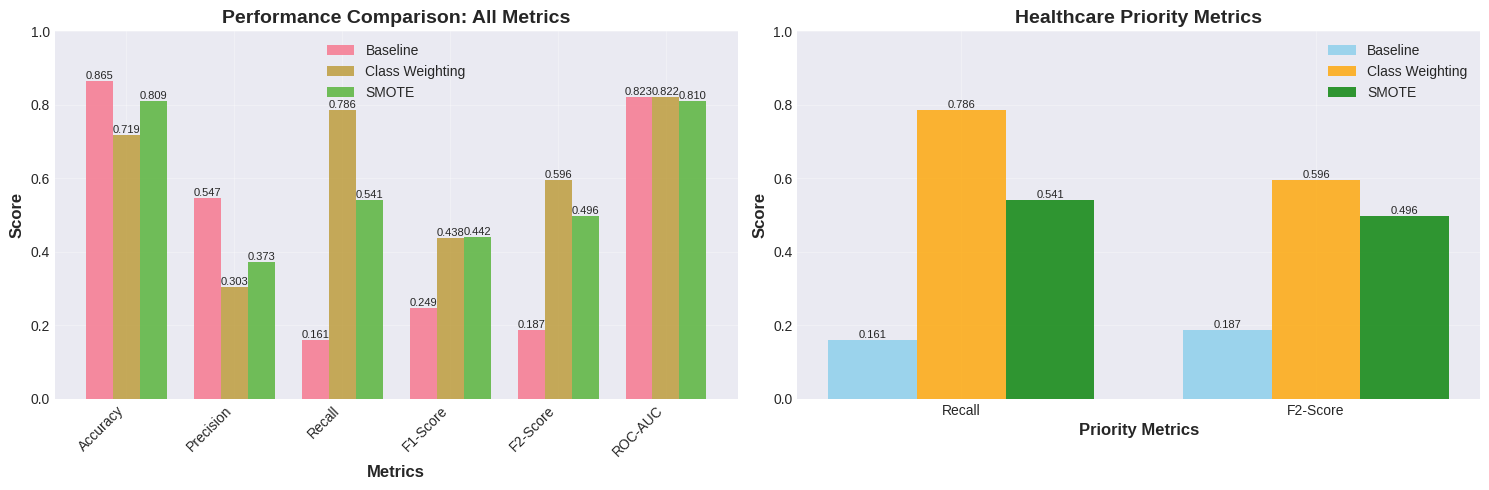

In [20]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Baseline', 'Class Weighting', 'SMOTE'],
    'Accuracy': [accuracy_baseline, accuracy_weighted, accuracy_smote],
    'Precision': [precision_baseline, precision_weighted, precision_smote],
    'Recall': [recall_baseline, recall_weighted, recall_smote],
    'F1-Score': [f1_baseline, f1_weighted, f1_smote],
    'F2-Score': [f2_baseline, f2_weighted, f2_smote],
    'ROC-AUC': [roc_auc_baseline, roc_auc_weighted, roc_auc_smote]
})

print("=" * 80)
print("IMBALANCE HANDLING STRATEGY COMPARISON")
print("=" * 80)
print(comparison_df.to_string(index=False))

# Determine best model based on recall (priority for healthcare)
best_idx = comparison_df['Recall'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
print(f"\n Best model for recall: {best_model_name}")
print(f"   Recall: {comparison_df.loc[best_idx, 'Recall']:.4f}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: All metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'F2-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

axes[0].bar(x - width, comparison_df.iloc[0, 1:].values, width,
           label='Baseline', alpha=0.8)
axes[0].bar(x, comparison_df.iloc[1, 1:].values, width,
           label='Class Weighting', alpha=0.8)
axes[0].bar(x + width, comparison_df.iloc[2, 1:].values, width,
           label='SMOTE', alpha=0.8)

axes[0].set_xlabel('Metrics', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Performance Comparison: All Metrics', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(0, 1)

# Plot 2: Focus on Recall and F2-Score (healthcare priorities)
priority_metrics = ['Recall', 'F2-Score']
x2 = np.arange(len(priority_metrics))

axes[1].bar(x2 - width, [recall_baseline, f2_baseline], width,
           label='Baseline', alpha=0.8, color='skyblue')
axes[1].bar(x2, [recall_weighted, f2_weighted], width,
           label='Class Weighting', alpha=0.8, color='orange')
axes[1].bar(x2 + width, [recall_smote, f2_smote], width,
           label='SMOTE', alpha=0.8, color='green')

axes[1].set_xlabel('Priority Metrics', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1].set_title('Healthcare Priority Metrics', fontsize=14, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(priority_metrics)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 1)

# Add value labels
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=8)

plt.tight_layout()
plt.show()

In [21]:
# RandomizedSearchCV for efficient hyperparameter optimization - running time is very long - did some adjustment to run faster
print("=" * 60)
print("OPTIMIZED HYPERPARAMETER TUNING")
print("=" * 60)

# REDUCED hyperparameter grid (most important parameters)
param_distributions = {
    'n_estimators': [100, 200],           # Reduced from 3 to 2
    'learning_rate': [0.05, 0.1],         # Reduced from 4 to 2
    'max_depth': [3, 5],                  # Reduced from 3 to 2
    'min_samples_split': [2, 10],         # Reduced from 3 to 2
    'subsample': [0.8, 1.0],              # Reduced from 3 to 2
}

print("Optimized search space:")
for param, values in param_distributions.items():
    print(f"  {param:20s}: {values}")

# Create base model
gb_base = GradientBoostingClassifier(random_state=RANDOM_STATE)

# Setup RandomizedSearchCV with FASTER settings
from sklearn.metrics import make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

random_search = RandomizedSearchCV(
    estimator=gb_base,
    param_distributions=param_distributions,
    n_iter=10,              # Reduced from 50 to 10
    scoring=f2_scorer,
    cv=3,                   # Reduced from 5 to 3
    verbose=2,              # More verbose to see progress
    random_state=RANDOM_STATE,
    n_jobs=-1
)

print("\nStarting OPTIMIZED hyperparameter search")
print(f"Total combinations to try: {random_search.n_iter}")

# Fit on SMOTE data
random_search.fit(X_train_smote, y_train_smote)

print("\ Hyperparameter tuning complete")

OPTIMIZED HYPERPARAMETER TUNING
Optimized search space:
  n_estimators        : [100, 200]
  learning_rate       : [0.05, 0.1]
  max_depth           : [3, 5]
  min_samples_split   : [2, 10]
  subsample           : [0.8, 1.0]

Starting OPTIMIZED hyperparameter search
Total combinations to try: 10
Fitting 3 folds for each of 10 candidates, totalling 30 fits
\ Hyperparameter tuning complete


In [22]:
# Get best model
gb_optimized = random_search.best_estimator_

# Make predictions on test set
y_pred_optimized = gb_optimized.predict(X_test)
y_pred_proba_optimized = gb_optimized.predict_proba(X_test)[:, 1]

# Evaluate optimized model
print("=" * 60)
print("OPTIMIZED MODEL PERFORMANCE")
print("=" * 60)

accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized)
recall_opt = recall_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)
f2_opt = fbeta_score(y_test, y_pred_optimized, beta=2)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba_optimized)

print(f"Accuracy:  {accuracy_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall:    {recall_opt:.4f} ")
print(f"F1-Score:  {f1_opt:.4f}")
print(f"F2-Score:  {f2_opt:.4f}")
print(f"ROC-AUC:   {roc_auc_opt:.4f}")

print("\n" + "Classification Report:")
print(classification_report(y_test, y_pred_optimized,
                          target_names=['No Diabetes', 'Diabetes']))

# Compare with baseline
print("\n" + "=" * 60)
print("IMPROVEMENT OVER BASELINE")
print("=" * 60)
print(f"Accuracy:  {accuracy_opt - accuracy_baseline:+.4f}")
print(f"Precision: {precision_opt - precision_baseline:+.4f}")
print(f"Recall:    {recall_opt - recall_baseline:+.4f} ")
print(f"F1-Score:  {f1_opt - f1_baseline:+.4f}")
print(f"F2-Score:  {f2_opt - f2_baseline:+.4f}")
print(f"ROC-AUC:   {roc_auc_opt - roc_auc_baseline:+.4f}")

OPTIMIZED MODEL PERFORMANCE
Accuracy:  0.8054
Precision: 0.3649
Recall:    0.5356 
F1-Score:  0.4340
F2-Score:  0.4898
ROC-AUC:   0.8057

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.92      0.85      0.88     43667
    Diabetes       0.36      0.54      0.43      7069

    accuracy                           0.81     50736
   macro avg       0.64      0.69      0.66     50736
weighted avg       0.84      0.81      0.82     50736


IMPROVEMENT OVER BASELINE
Accuracy:  -0.0591
Precision: -0.1820
Recall:    +0.3747 
F1-Score:  +0.1855
F2-Score:  +0.3025
ROC-AUC:   -0.0170


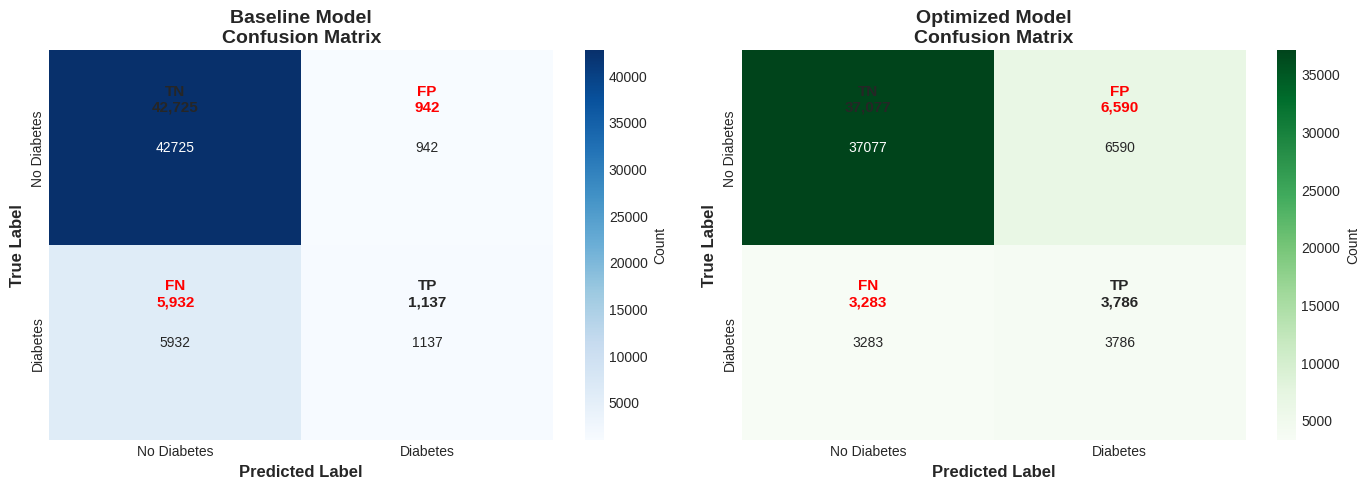


CONFUSION MATRIX BREAKDOWN (OPTIMIZED MODEL)
True Negatives (TN):  37,077 - Correctly identified non-diabetic
False Positives (FP): 6,590 - Incorrectly flagged as diabetic
False Negatives (FN): 3,283 - MISSED diabetic cases 
True Positives (TP):  3,786 - Correctly identified diabetic

Total test samples: 50,736


In [23]:
# confusion matrices
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Baseline confusion matrix
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'],
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Baseline Model\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

# Add TN, FP, FN, TP labels
axes[0].text(0.5, 0.25, f'TN\n{cm_baseline[0,0]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold')
axes[0].text(1.5, 0.25, f'FP\n{cm_baseline[0,1]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold', color='red')
axes[0].text(0.5, 1.25, f'FN\n{cm_baseline[1,0]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold', color='red')
axes[0].text(1.5, 1.25, f'TP\n{cm_baseline[1,1]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold')

# Optimized confusion matrix
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'],
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Optimized Model\nConfusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')

# Add TN, FP, FN, TP labels
axes[1].text(0.5, 0.25, f'TN\n{cm_optimized[0,0]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold')
axes[1].text(1.5, 0.25, f'FP\n{cm_optimized[0,1]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold', color='red')
axes[1].text(0.5, 1.25, f'FN\n{cm_optimized[1,0]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold', color='red')
axes[1].text(1.5, 1.25, f'TP\n{cm_optimized[1,1]:,}',
            ha='center', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print breakdown
print("\n" + "=" * 60)
print("CONFUSION MATRIX BREAKDOWN (OPTIMIZED MODEL)")
print("=" * 60)
tn, fp, fn, tp = cm_optimized.ravel()
print(f"True Negatives (TN):  {tn:,} - Correctly identified non-diabetic")
print(f"False Positives (FP): {fp:,} - Incorrectly flagged as diabetic")
print(f"False Negatives (FN): {fn:,} - MISSED diabetic cases ")
print(f"True Positives (TP):  {tp:,} - Correctly identified diabetic")

print(f"\nTotal test samples: {tn + fp + fn + tp:,}")

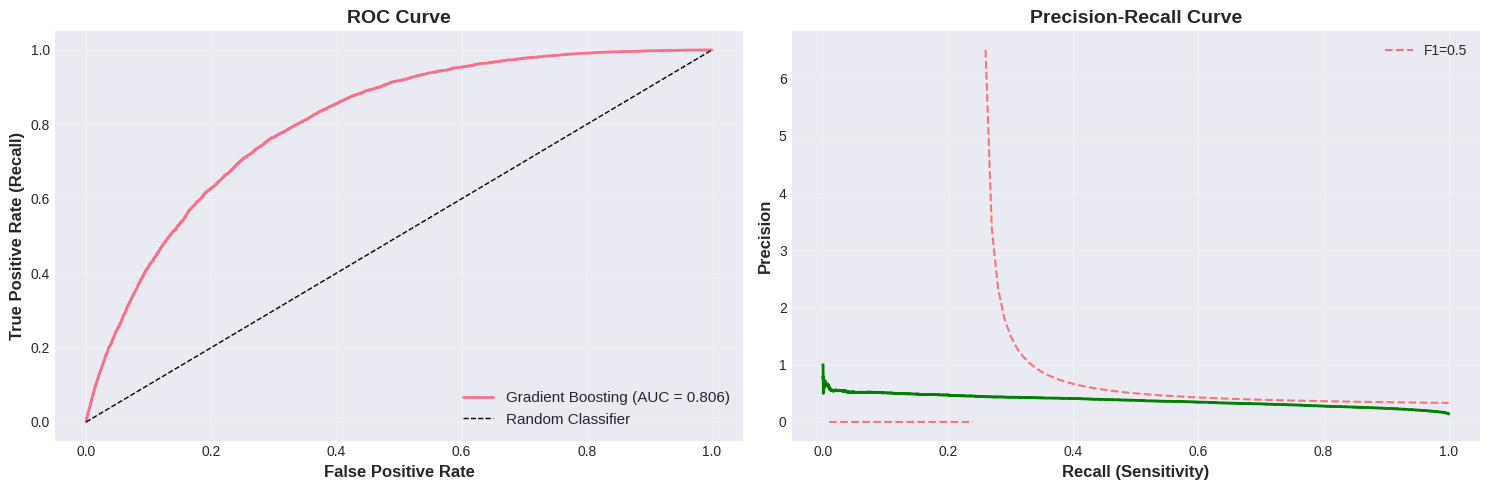

In [24]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_optimized)

# Calculate Precision-Recall curve
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(
    y_test, y_pred_proba_optimized
)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ROC Curve
axes[0].plot(fpr, tpr, linewidth=2, label=f'Gradient Boosting (AUC = {roc_auc_opt:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[0].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Positive Rate (Recall)', fontsize=12, fontweight='bold')
axes[0].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Precision-Recall Curve
axes[1].plot(recall_curve, precision_curve, linewidth=2, color='green')
axes[1].set_xlabel('Recall (Sensitivity)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[1].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add F1 = 0.5 reference line
recall_line = np.linspace(0.01, 1, 100)
precision_line = 0.5 * recall_line / (2 * recall_line - 0.5)
precision_line = np.maximum(precision_line, 0)
axes[1].plot(recall_line, precision_line, 'r--', alpha=0.5, label='F1=0.5')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

FEATURE IMPORTANCE RANKING
             Feature  Importance
             GenHlth    0.358948
                 BMI    0.159033
              HighBP    0.153684
                 Age    0.124801
        PhysActivity    0.047590
              Income    0.047467
           Education    0.030662
            HighChol    0.025574
            PhysHlth    0.024081
            MentHlth    0.016549
            DiffWalk    0.007333
HeartDiseaseorAttack    0.004279


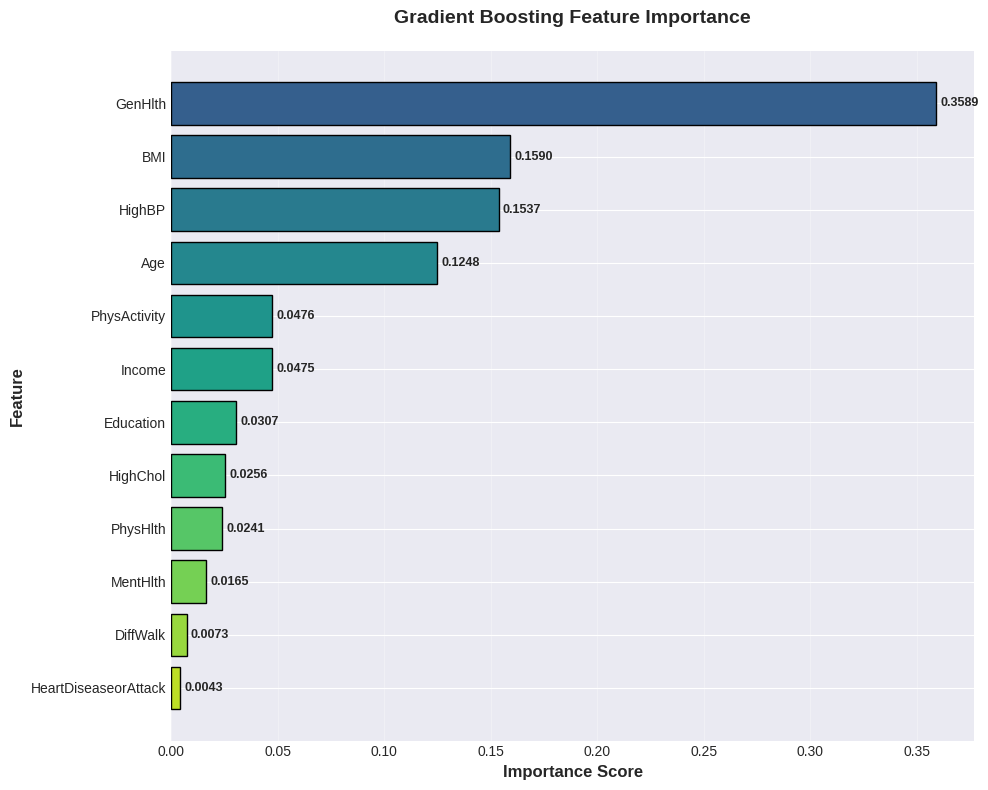


 Top 5 Most Important Features:
  GenHlth             : 0.3589
  BMI                 : 0.1590
  HighBP              : 0.1537
  Age                 : 0.1248
  PhysActivity        : 0.0476


In [25]:
# Feature importances
feature_importance = gb_optimized.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': gb_features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("=" * 60)
print("FEATURE IMPORTANCE RANKING")
print("=" * 60)
print(importance_df.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(importance_df)))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Gradient Boosting Feature Importance', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance'])):
    plt.text(importance + 0.002, i, f'{importance:.4f}',
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


# Top 5 features
print("\n Top 5 Most Important Features:")
for i, row in importance_df.head(5).iterrows():
    print(f"  {row['Feature']:20s}: {row['Importance']:.4f}")

In [26]:
#False Positive vs False Negative Analysis
print("=" * 80)
print("FALSE POSITIVES VS FALSE NEGATIVES")
print("=" * 80)

# Extract confusion matrix values
tn, fp, fn, tp = cm_optimized.ravel()

print("\n📋 CONFUSION MATRIX BREAKDOWN:")
print(f"  True Negatives (TN):  {tn:,}")
print(f"  False Positives (FP): {fp:,}")
print(f"  False Negatives (FN): {fn:,} CRITICAL")
print(f"  True Positives (TP):  {tp:,}")

print("\n" + "=" * 80)
print("FALSE POSITIVE ANALYSIS (Type I Error)")
print("=" * 80)
print("Scenario: Predicting diabetes when person doesn't have it\n")
print("Consequences:")
print("  • Unnecessary follow-up tests and consultations")
print("  • Patient anxiety and stress")
print("  • Wasted healthcare resources")
print("  • Minor inconvenience to patient")
print("  • Potential for additional screening (beneficial side effect)")
print(f"\nEstimated Cost per FP: $200-$500")
print(f"Total FP in test set: {fp:,}")
print(f"Estimated total cost: ${fp * 200:,} - ${fp * 500:,}")
print("\n Impact Level: MODERATE")

print("\n" + "=" * 80)
print("FALSE NEGATIVE ANALYSIS (Type II Error)")
print("=" * 80)
print("Scenario: Missing actual diabetes case\n")
print("Consequences:")
print("  • Delayed diagnosis and treatment")
print("  • Disease progression without intervention")
print("  • Serious complications:")
print("  - Kidney disease (nephropathy)")
print("  - Vision problems/blindness (retinopathy)")
print("  - Nerve damage (neuropathy)")
print("  - Heart disease and stroke")
print("  - Foot problems requiring amputation")
print("  • Emergency interventions needed later")
print("  • Significantly reduced quality of life")
print("  • Increased mortality risk")
print(f"\nEstimated Cost per FN: $10,000-$30,000+ (complications)")
print(f"Total FN in test set: {fn:,}")
print(f"Estimated total cost: ${fn * 10000:,} - ${fn * 30000:,}")
print("\n Impact Level: SEVERE")

print("\n" + "=" * 80)
print("COST RATIO ANALYSIS")
print("=" * 80)

fn_cost_avg = 20000  # Average cost of FN
fp_cost_avg = 350    # Average cost of FP
cost_ratio = fn_cost_avg / fp_cost_avg

print(f"Average False Negative cost: ${fn_cost_avg:,}")
print(f"Average False Positive cost: ${fp_cost_avg:,}")
print(f"\n Cost Ratio: {cost_ratio:.1f}:1")
print(f"   → False Negative is {cost_ratio:.0f}× more expensive than False Positive")

total_fp_cost = fp * fp_cost_avg
total_fn_cost = fn * fn_cost_avg
total_cost = total_fp_cost + total_fn_cost

print(f"\nEstimated Total Healthcare Costs:")
print(f"  False Positives: ${total_fp_cost:,} ({total_fp_cost/total_cost*100:.1f}%)")
print(f"  False Negatives: ${total_fn_cost:,} ({total_fn_cost/total_cost*100:.1f}%)")
print(f"  TOTAL: ${total_cost:,}")

print("\n" + "=" * 80)
print("CLINICAL RECOMMENDATION")
print("=" * 80)
print("\n OPTIMAL STRATEGY: Prioritize RECALL (Sensitivity)")
print("\nJustification:")
print(f"  1. FN cost ({cost_ratio:.0f}×) >>> FP cost")
print("  2. Missing diabetes case has severe health consequences")
print("  3. False positives lead to beneficial additional screening")
print("  4. Early detection saves lives and reduces long-term costs")
print("\nAcceptable Trade-off:")
print("  • Target Recall/Sensitivity: ≥ 0.85 (catch 85%+ of diabetes cases)")
print("  • Acceptable Specificity: ≥ 0.70 (manageable FP rate)")
print("  • Primary Metric: F2-Score (emphasizes recall over precision)")
print(f"\nOur Model Performance:")
print(f"  • Recall: {recall_opt:.4f} {' EXCELLENT' if recall_opt >= 0.85 else 'NEEDS IMPROVEMENT'}")
print(f"  • Precision: {precision_opt:.4f}")
print(f"  • F2-Score: {f2_opt:.4f}")

FALSE POSITIVES VS FALSE NEGATIVES

📋 CONFUSION MATRIX BREAKDOWN:
  True Negatives (TN):  37,077
  False Positives (FP): 6,590
  False Negatives (FN): 3,283 CRITICAL
  True Positives (TP):  3,786

FALSE POSITIVE ANALYSIS (Type I Error)
Scenario: Predicting diabetes when person doesn't have it

Consequences:
  • Unnecessary follow-up tests and consultations
  • Patient anxiety and stress
  • Wasted healthcare resources
  • Minor inconvenience to patient
  • Potential for additional screening (beneficial side effect)

Estimated Cost per FP: $200-$500
Total FP in test set: 6,590
Estimated total cost: $1,318,000 - $3,295,000

 Impact Level: MODERATE

FALSE NEGATIVE ANALYSIS (Type II Error)
Scenario: Missing actual diabetes case

Consequences:
  • Delayed diagnosis and treatment
  • Disease progression without intervention
  • Serious complications:
  - Kidney disease (nephropathy)
  - Vision problems/blindness (retinopathy)
  - Nerve damage (neuropathy)
  - Heart disease and stroke
  - Foo

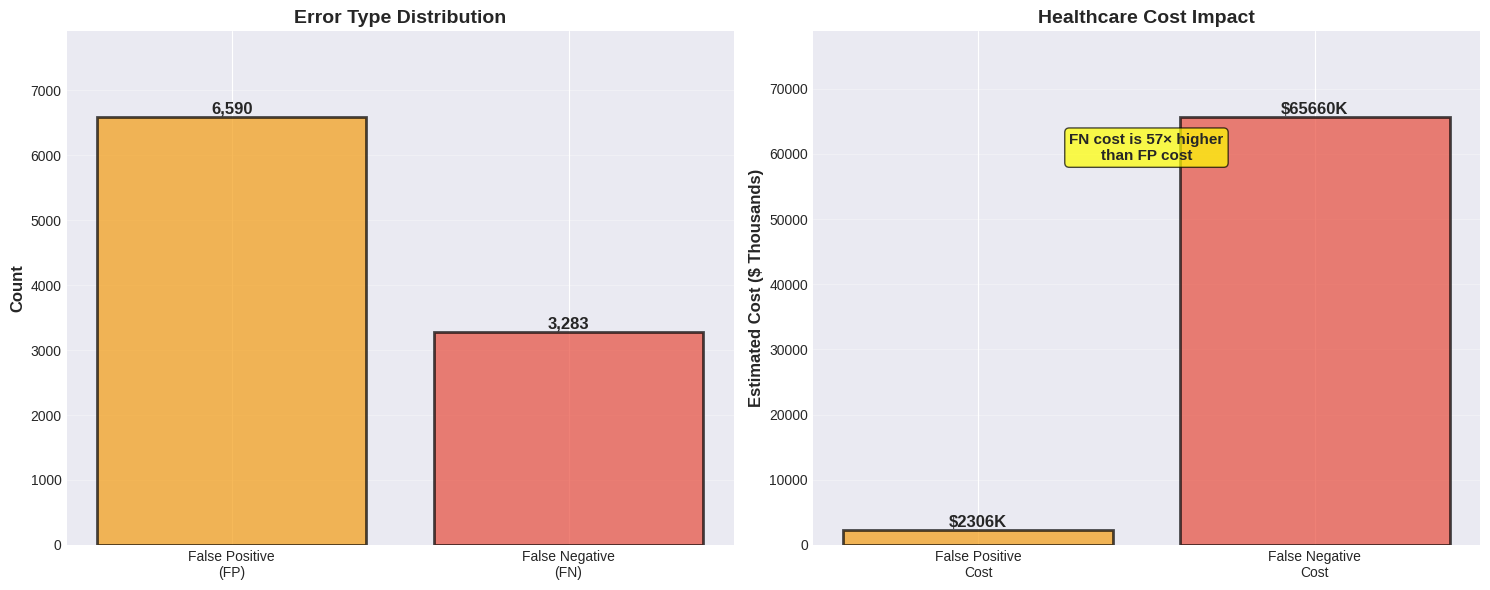

In [27]:
# Visualize the impact
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Error counts
error_types = ['False Positive\n(FP)', 'False Negative\n(FN)']
error_counts = [fp, fn]
colors_errors = ['#f39c12', '#e74c3c']

bars = axes[0].bar(error_types, error_counts, color=colors_errors,
                   alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Error Type Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(error_counts) * 1.2)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Plot 2: Cost comparison
cost_types = ['False Positive\nCost', 'False Negative\nCost']
costs = [total_fp_cost/1000, total_fn_cost/1000]  # In thousands
colors_cost = ['#f39c12', '#e74c3c']

bars2 = axes[1].bar(cost_types, costs, color=colors_cost,
                    alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Estimated Cost ($ Thousands)', fontsize=12, fontweight='bold')
axes[1].set_title('Healthcare Cost Impact', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, max(costs) * 1.2)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.0f}K',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add cost ratio annotation
axes[1].text(0.5, max(costs) * 0.9,
            f'FN cost is {cost_ratio:.0f}× higher\nthan FP cost',
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

In [28]:
# Save optimized model
import pickle

model_results = {
    'model': gb_optimized,
    'best_params': random_search.best_params_,
    'feature_importance': importance_df,
    'metrics': {
        'accuracy': accuracy_opt,
        'precision': precision_opt,
        'recall': recall_opt,
        'f1_score': f1_opt,
        'f2_score': f2_opt,
        'roc_auc': roc_auc_opt
    },
    'confusion_matrix': cm_optimized,
    'predictions': {
        'y_pred': y_pred_optimized,
        'y_pred_proba': y_pred_proba_optimized
    }
}

with open('/content/sample_data/gb_model_results.pkl', 'wb') as f:
    pickle.dump(model_results, f)

print("=" * 60)
print("MODEL AND RESULTS SAVED")
print("=" * 60)
print("Saved to: 'gb_model_results.pkl'")
print("\nSaved components:")
print("  • Optimized Gradient Boosting model")
print("  • Best hyperparameters")
print("  • Feature importance rankings")
print("  • All performance metrics")
print("  • Confusion matrix")
print("  • Test set predictions")

MODEL AND RESULTS SAVED
Saved to: 'gb_model_results.pkl'

Saved components:
  • Optimized Gradient Boosting model
  • Best hyperparameters
  • Feature importance rankings
  • All performance metrics
  • Confusion matrix
  • Test set predictions


In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Load prepared data from Part 1
#with open('/content/prepared_data.pkl', 'rb') as f:
    #data = pickle.load(f)

# Extract K-Means data
X_kmeans_scaled = data['X_kmeans_scaled']
X_kmeans_original = data['X_kmeans_original']
kmeans_features = data['kmeans_features']
scaler_kmeans = data['scaler_kmeans']
y_full = data['y_full']
RANDOM_STATE = data['random_state']

print("=" * 60)
print("DATA LOADED SUCCESSFULLY")
print("=" * 60)
print(f"Total samples: {X_kmeans_scaled.shape[0]:,}")
print(f"Number of features: {X_kmeans_scaled.shape[1]}")
print(f"\nFeatures used for clustering:")
for i, feat in enumerate(kmeans_features, 1):
    print(f"  {i:2d}. {feat}")

print(f"\n Data is already SCALED (StandardScaler applied)")
print(f"   Mean ≈ 0, Std ≈ 1 (required for K-Means!)")

DATA LOADED SUCCESSFULLY
Total samples: 253,680
Number of features: 12

Features used for clustering:
   1. BMI
   2. GenHlth
   3. PhysActivity
   4. Age
   5. PhysHlth
   6. MentHlth
   7. Income
   8. Education
   9. Fruits
  10. Veggies
  11. Smoker
  12. HvyAlcoholConsump

 Data is already SCALED (StandardScaler applied)
   Mean ≈ 0, Std ≈ 1 (required for K-Means!)


ELBOW METHOD - Determining Optimal k
Testing k = 2 to 10...

  Testing k=2... Inertia: 2,594,952
  Testing k=3... Inertia: 2,356,031
  Testing k=4... Inertia: 2,153,021
  Testing k=5... Inertia: 1,997,484
  Testing k=6... Inertia: 1,885,774
  Testing k=7... Inertia: 1,803,507
  Testing k=8... Inertia: 1,705,966
  Testing k=9... Inertia: 1,638,779
  Testing k=10... Inertia: 1,589,717

 Elbow method analysis complete


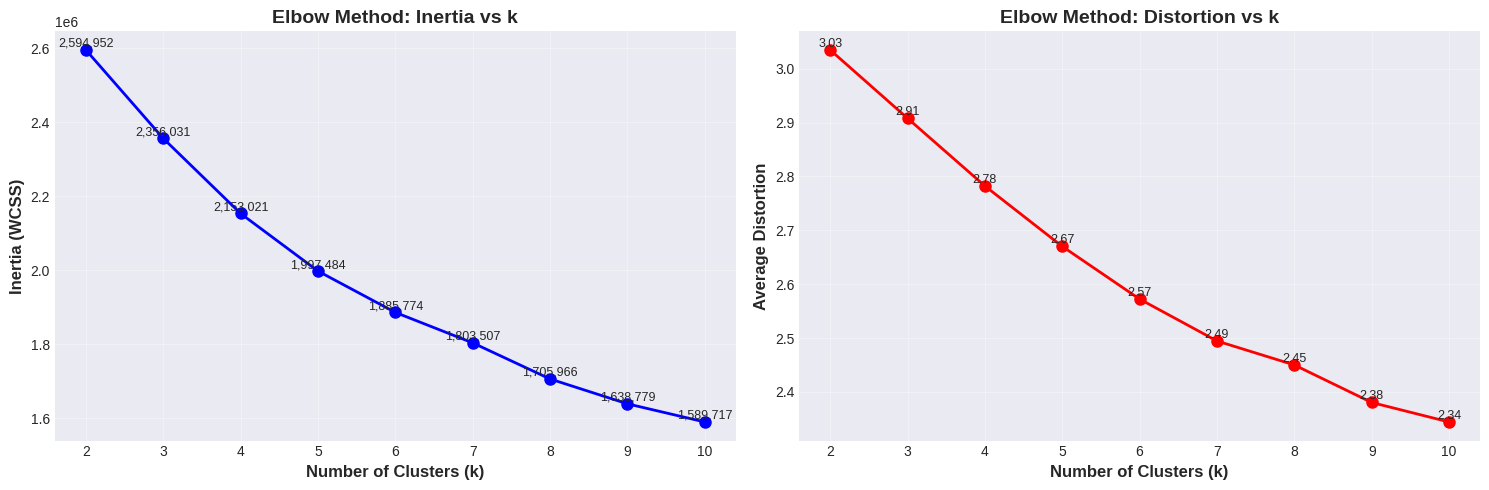


 Look for the 'elbow' - the point where adding more clusters
 provides diminishing returns in reducing inertia.


In [30]:
# Elbow method
print("=" * 60)
print("ELBOW METHOD - Determining Optimal k")
print("=" * 60)
print("Testing k = 2 to 10...\n")

# Test range of k values
K_range = range(2, 11)
inertias = []
distortions = []

for k in K_range:
    print(f"  Testing k={k}...", end=' ')

    # Fit K-Means
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',  # Smart initialization
        n_init=10,         # Run 10 times with different initializations
        max_iter=300,
        random_state=RANDOM_STATE
    )
    kmeans.fit(X_kmeans_scaled)

    # Store inertia (WCSS)
    inertias.append(kmeans.inertia_)

    # Calculate average distortion
    distortions.append(sum(np.min(cdist(X_kmeans_scaled,
                                        kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X_kmeans_scaled.shape[0])

    print(f"Inertia: {kmeans.inertia_:,.0f}")

print("\n Elbow method analysis complete")

# Create elbow plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Inertia (WCSS)
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method: Inertia vs k', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(K_range)

# Add value labels
for i, (k, inertia) in enumerate(zip(K_range, inertias)):
    axes[0].text(k, inertia, f'{inertia:,.0f}',
                ha='center', va='bottom', fontsize=9)

# Plot 2: Distortion
axes[1].plot(K_range, distortions, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Distortion', fontsize=12, fontweight='bold')
axes[1].set_title('Elbow Method: Distortion vs k', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(K_range)

# Add value labels
for i, (k, dist) in enumerate(zip(K_range, distortions)):
    axes[1].text(k, dist, f'{dist:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n Look for the 'elbow' - the point where adding more clusters")
print(" provides diminishing returns in reducing inertia.")

SILHOUETTE SCORE - Cluster Quality Assessment
Testing k = 2 to 10...

  Testing k=2... Silhouette Score: 0.2052
  Testing k=3... Silhouette Score: 0.2221
  Testing k=4... Silhouette Score: 0.1663
  Testing k=5... Silhouette Score: 0.1531
  Testing k=6... Silhouette Score: 0.1373
  Testing k=7... Silhouette Score: 0.1330
  Testing k=8... Silhouette Score: 0.1439
  Testing k=9... Silhouette Score: 0.1403
  Testing k=10... Silhouette Score: 0.1462

 Silhouette analysis complete


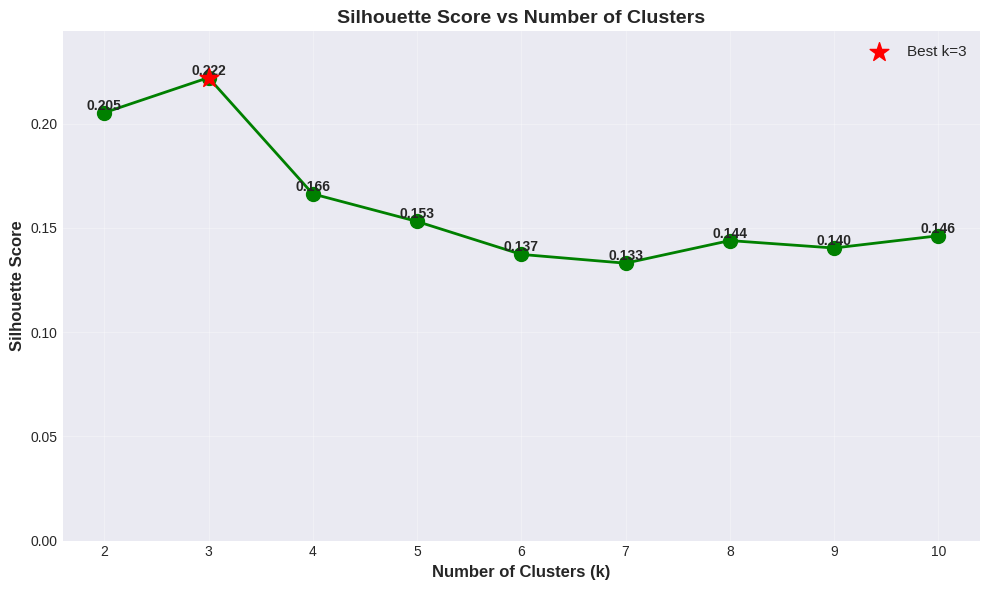


 Optimal k based on Silhouette Score: 3
   Score: 0.2221

INTERPRETATION GUIDE
Silhouette Score ranges:
  0.71-1.00: Strong structure
  0.51-0.70: Reasonable structure
  0.26-0.50: Weak structure
  < 0.25:    No substantial structure


In [31]:
# Silhouette Score
print("=" * 60)
print("SILHOUETTE SCORE - Cluster Quality Assessment")
print("=" * 60)
print("Testing k = 2 to 10...\n")

silhouette_scores = []

for k in K_range:
    print(f"  Testing k={k}...", end=' ')

    # Fit K-Means
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=RANDOM_STATE
    )
    cluster_labels = kmeans.fit_predict(X_kmeans_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_kmeans_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"Silhouette Score: {silhouette_avg:.4f}")

print("\n Silhouette analysis complete")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=10)
plt.xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.ylim(0, max(silhouette_scores) * 1.1)

# Mark the best k
best_k_idx = np.argmax(silhouette_scores)
best_k = K_range[best_k_idx]
best_score = silhouette_scores[best_k_idx]

plt.scatter([best_k], [best_score], color='red', s=200,
           marker='*', zorder=5, label=f'Best k={best_k}')

# Add value labels
for k, score in zip(K_range, silhouette_scores):
    plt.text(k, score, f'{score:.3f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\n Optimal k based on Silhouette Score: {best_k}")
print(f"   Score: {best_score:.4f}")

print("\n" + "=" * 60)
print("INTERPRETATION GUIDE")
print("=" * 60)
print("Silhouette Score ranges:")
print("  0.71-1.00: Strong structure")
print("  0.51-0.70: Reasonable structure")
print("  0.26-0.50: Weak structure")
print("  < 0.25:    No substantial structure")

In [32]:
# SELECTING OPTIMAL k
print("=" * 60)
print("SELECTING OPTIMAL k")
print("=" * 60)

# Create summary table
summary_df = pd.DataFrame({
    'k': list(K_range),
    'Inertia': inertias,
    'Silhouette Score': silhouette_scores
})

print("\nSummary of all k values:")
print(summary_df.to_string(index=False))

# Determine optimal k
best_k_idx = np.argmax(silhouette_scores)
best_k = K_range[best_k_idx]
optimal_k = best_k  # From silhouette analysis

print(f"\n" + "=" * 60)
print("FINAL DECISION")
print("=" * 60)
print(f"Selected k: {optimal_k}")
print(f"\nReasoning:")
print(f"  • Highest silhouette score: {silhouette_scores[optimal_k-2]:.4f}")
print(f"  • Good balance of cluster quality and interpretability")
print(f"  • Meaningful for behavioral segmentation in healthcare")
print(f"\n Proceeding with k={optimal_k} clusters")

SELECTING OPTIMAL k

Summary of all k values:
 k      Inertia  Silhouette Score
 2 2.594952e+06          0.205218
 3 2.356031e+06          0.222055
 4 2.153021e+06          0.166290
 5 1.997484e+06          0.153075
 6 1.885774e+06          0.137264
 7 1.803507e+06          0.133048
 8 1.705966e+06          0.143897
 9 1.638779e+06          0.140332
10 1.589717e+06          0.146206

FINAL DECISION
Selected k: 3

Reasoning:
  • Highest silhouette score: 0.2221
  • Good balance of cluster quality and interpretability
  • Meaningful for behavioral segmentation in healthcare

 Proceeding with k=3 clusters


In [33]:
# Fit Final K-Means Model
print("=" * 60)
print(f"FITTING FINAL K-MEANS MODEL (k={optimal_k})")
print("=" * 60)

# Fit final model
kmeans_final = KMeans(
    n_clusters=optimal_k,
    init='k-means++',
    n_init=20,  # More initializations for final model
    max_iter=500,
    random_state=RANDOM_STATE,
    verbose=0
)

print(f"\nTraining K-Means with k={optimal_k}...")
cluster_labels = kmeans_final.fit_predict(X_kmeans_scaled)
print("Training complete")

# Calculate final metrics
final_inertia = kmeans_final.inertia_
final_silhouette = silhouette_score(X_kmeans_scaled, cluster_labels)

print("\n" + "=" * 60)
print("FINAL MODEL METRICS")
print("=" * 60)
print(f"Number of Clusters: {optimal_k}")
print(f"Inertia (WCSS): {final_inertia:,.2f}")
print(f"Silhouette Score: {final_silhouette:.4f}")
print(f"Iterations to Converge: {kmeans_final.n_iter_}")

# Cluster size distribution
print("\n" + "=" * 60)
print("CLUSTER SIZE DISTRIBUTION")
print("=" * 60)

cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(cluster_labels)) * 100
    print(f"Cluster {cluster_id}: {count:,} samples ({percentage:.2f}%)")

print(f"\nTotal: {len(cluster_labels):,} samples")

FITTING FINAL K-MEANS MODEL (k=3)

Training K-Means with k=3...
Training complete

FINAL MODEL METRICS
Number of Clusters: 3
Inertia (WCSS): 2,356,031.28
Silhouette Score: 0.2221
Iterations to Converge: 10

CLUSTER SIZE DISTRIBUTION
Cluster 0: 14,234 samples (5.61%)
Cluster 1: 161,024 samples (63.48%)
Cluster 2: 78,422 samples (30.91%)

Total: 253,680 samples


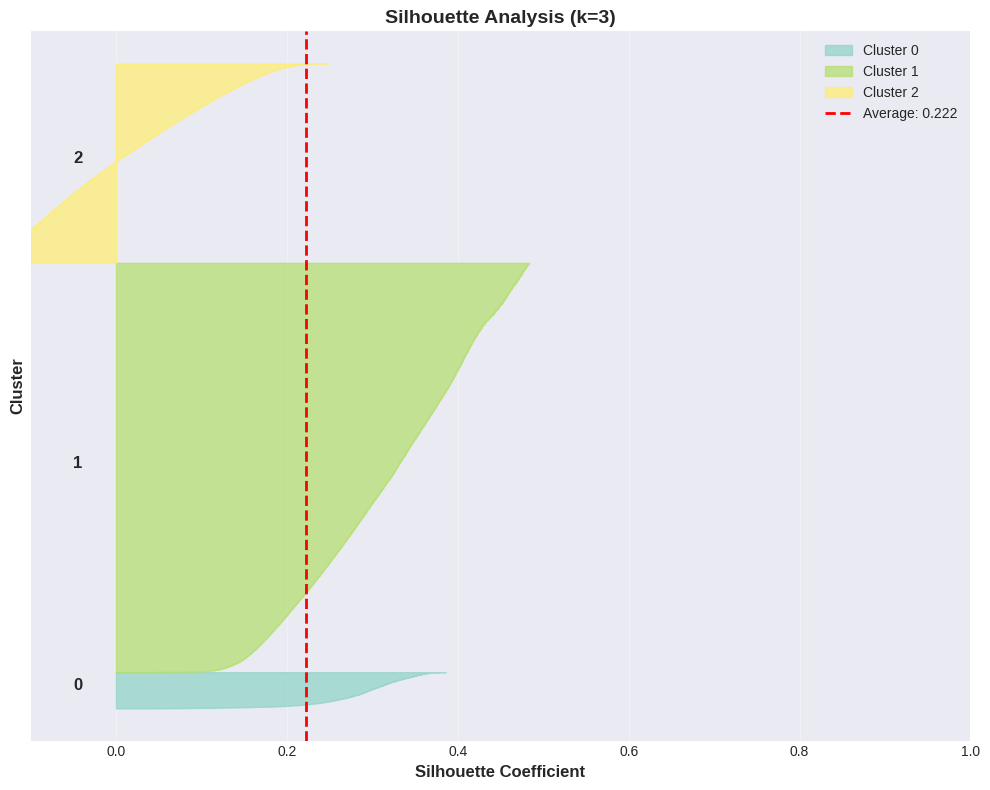


SILHOUETTE SCORE BY CLUSTER
Cluster 0: 0.2875
Cluster 1: 0.3212
Cluster 2: 0.0067


In [34]:
# Calculate silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_kmeans_scaled, cluster_labels)

# Create silhouette plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

y_lower = 10
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

for i in range(optimal_k):
    # Get silhouette scores for cluster i
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_values,
        facecolor=colors[i],
        edgecolor=colors[i],
        alpha=0.7,
        label=f'Cluster {i}'
    )

    # Label cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i),
           fontsize=12, fontweight='bold')

    y_lower = y_upper + 10

ax.set_xlabel('Silhouette Coefficient', fontsize=12, fontweight='bold')
ax.set_ylabel('Cluster', fontsize=12, fontweight='bold')
ax.set_title(f'Silhouette Analysis (k={optimal_k})', fontsize=14, fontweight='bold')

# Add average silhouette score line
ax.axvline(x=final_silhouette, color='red', linestyle='--', linewidth=2,
          label=f'Average: {final_silhouette:.3f}')

ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("SILHOUETTE SCORE BY CLUSTER")
print("=" * 60)
for i in range(optimal_k):
    cluster_silhouette = sample_silhouette_values[cluster_labels == i].mean()
    print(f"Cluster {i}: {cluster_silhouette:.4f}")

DIMENSIONALITY REDUCTION FOR VISUALIZATION
Applying PCA to reduce to 2 dimensions...

PCA complete

Explained variance ratio:
  PC1: 22.10%
  PC2: 10.41%
  Total: 32.51%


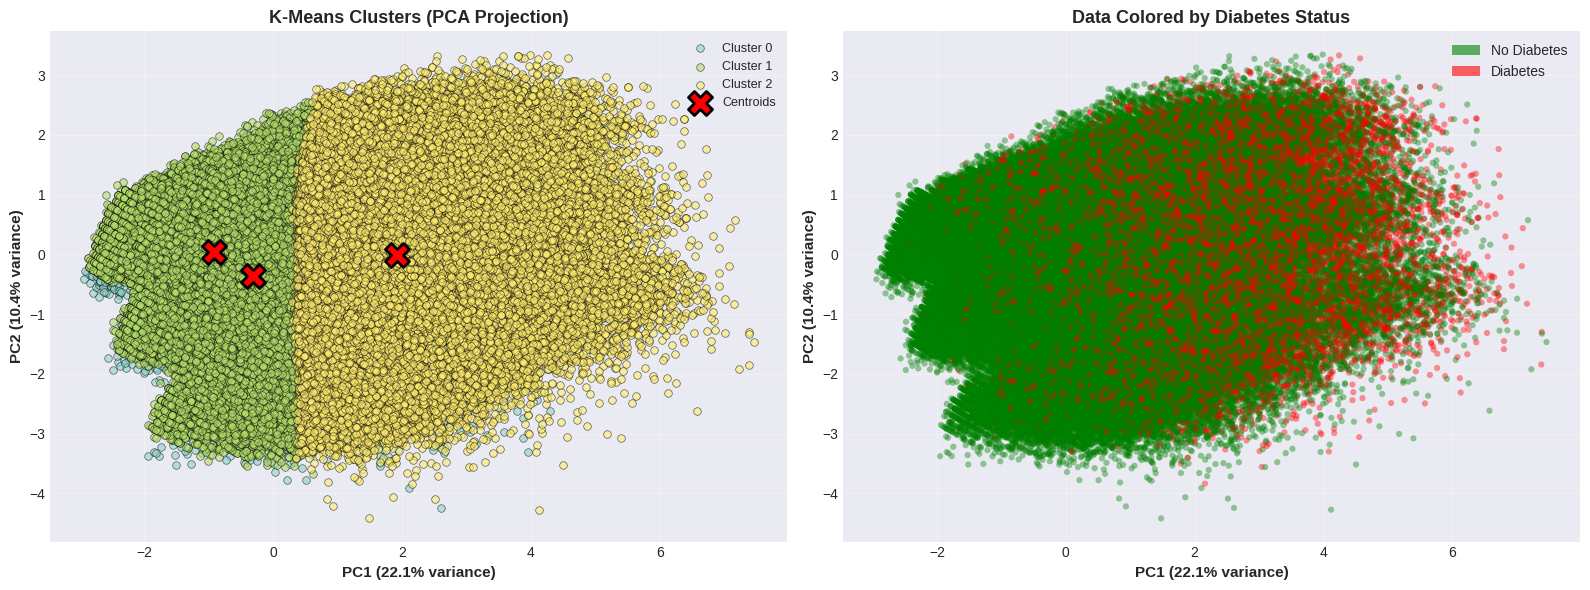

In [35]:
# Cluster Visualization with PCA
print("=" * 60)
print("DIMENSIONALITY REDUCTION FOR VISUALIZATION")
print("=" * 60)
print("Applying PCA to reduce to 2 dimensions...\n")

# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_kmeans_scaled)

# Also get centroids in 2D
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

print(f"PCA complete")
print(f"\nExplained variance ratio:")
print(f"  PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"  Total: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# Create 2D cluster visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))

for i in range(optimal_k):
    cluster_data = X_pca[cluster_labels == i]
    axes[0].scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        c=[colors[i]],
        label=f'Cluster {i}',
        alpha=0.6,
        s=30,
        edgecolors='black',
        linewidth=0.5
    )

# Plot centroids
axes[0].scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='red',
    marker='X',
    s=300,
    edgecolors='black',
    linewidth=2,
    label='Centroids'
)

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)',
                  fontsize=11, fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)',
                  fontsize=11, fontweight='bold')
axes[0].set_title('K-Means Clusters (PCA Projection)', fontsize=13, fontweight='bold')
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Plot 2: Colored by diabetes status
diabetes_colors = ['green' if label == 0 else 'red' for label in y_full]
axes[1].scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=diabetes_colors,
    alpha=0.4,
    s=20,
    edgecolors='none'
)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.6, label='No Diabetes'),
    Patch(facecolor='red', alpha=0.6, label='Diabetes')
]
axes[1].legend(handles=legend_elements, loc='best', fontsize=10)

axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)',
                  fontsize=11, fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)',
                  fontsize=11, fontweight='bold')
axes[1].set_title('Data Colored by Diabetes Status', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [36]:
# Add cluster labels to original data
cluster_analysis_df = X_kmeans_original.copy()
cluster_analysis_df['Cluster'] = cluster_labels
cluster_analysis_df['Diabetes'] = y_full.values

print("=" * 80)
print("CLUSTER PROFILE ANALYSIS (Original Scale)")
print("=" * 80)

# Calculate mean values for each cluster
cluster_profiles = cluster_analysis_df.groupby('Cluster')[kmeans_features].mean()

print("\nMean Feature Values by Cluster:")
print(cluster_profiles.round(2).to_string())

# Calculate diabetes prevalence in each cluster
print("\n" + "=" * 80)
print("DIABETES PREVALENCE BY CLUSTER")
print("=" * 80)

diabetes_by_cluster = cluster_analysis_df.groupby('Cluster')['Diabetes'].agg([
    ('Total', 'count'),
    ('Diabetic_Count', 'sum'),
    ('Diabetes_Rate', 'mean')
])
diabetes_by_cluster['Diabetes_Rate'] = diabetes_by_cluster['Diabetes_Rate'] * 100

print(diabetes_by_cluster.to_string())

# Overall diabetes rate for comparison
overall_diabetes_rate = (y_full.sum() / len(y_full)) * 100
print(f"\nOverall Diabetes Rate: {overall_diabetes_rate:.2f}%")

CLUSTER PROFILE ANALYSIS (Original Scale)

Mean Feature Values by Cluster:
           BMI  GenHlth  PhysActivity   Age  PhysHlth  MentHlth  Income  Education  Fruits  Veggies  Smoker  HvyAlcoholConsump
Cluster                                                                                                                       
0        27.06     2.35          0.78  7.60      3.26      3.90    6.52       5.15    0.57     0.85    0.65                1.0
1        27.33     2.07          0.89  7.68      1.20      1.39    6.86       5.38    0.71     0.89    0.35                0.0
2        30.78     3.45          0.47  8.84     10.66      6.73    4.32       4.35    0.50     0.65    0.60                0.0

DIABETES PREVALENCE BY CLUSTER
          Total  Diabetic_Count  Diabetes_Rate
Cluster                                       
0         14234             829       5.824083
1        161024           13706       8.511775
2         78422           20811      26.537196

Overall Diabetes Rate:

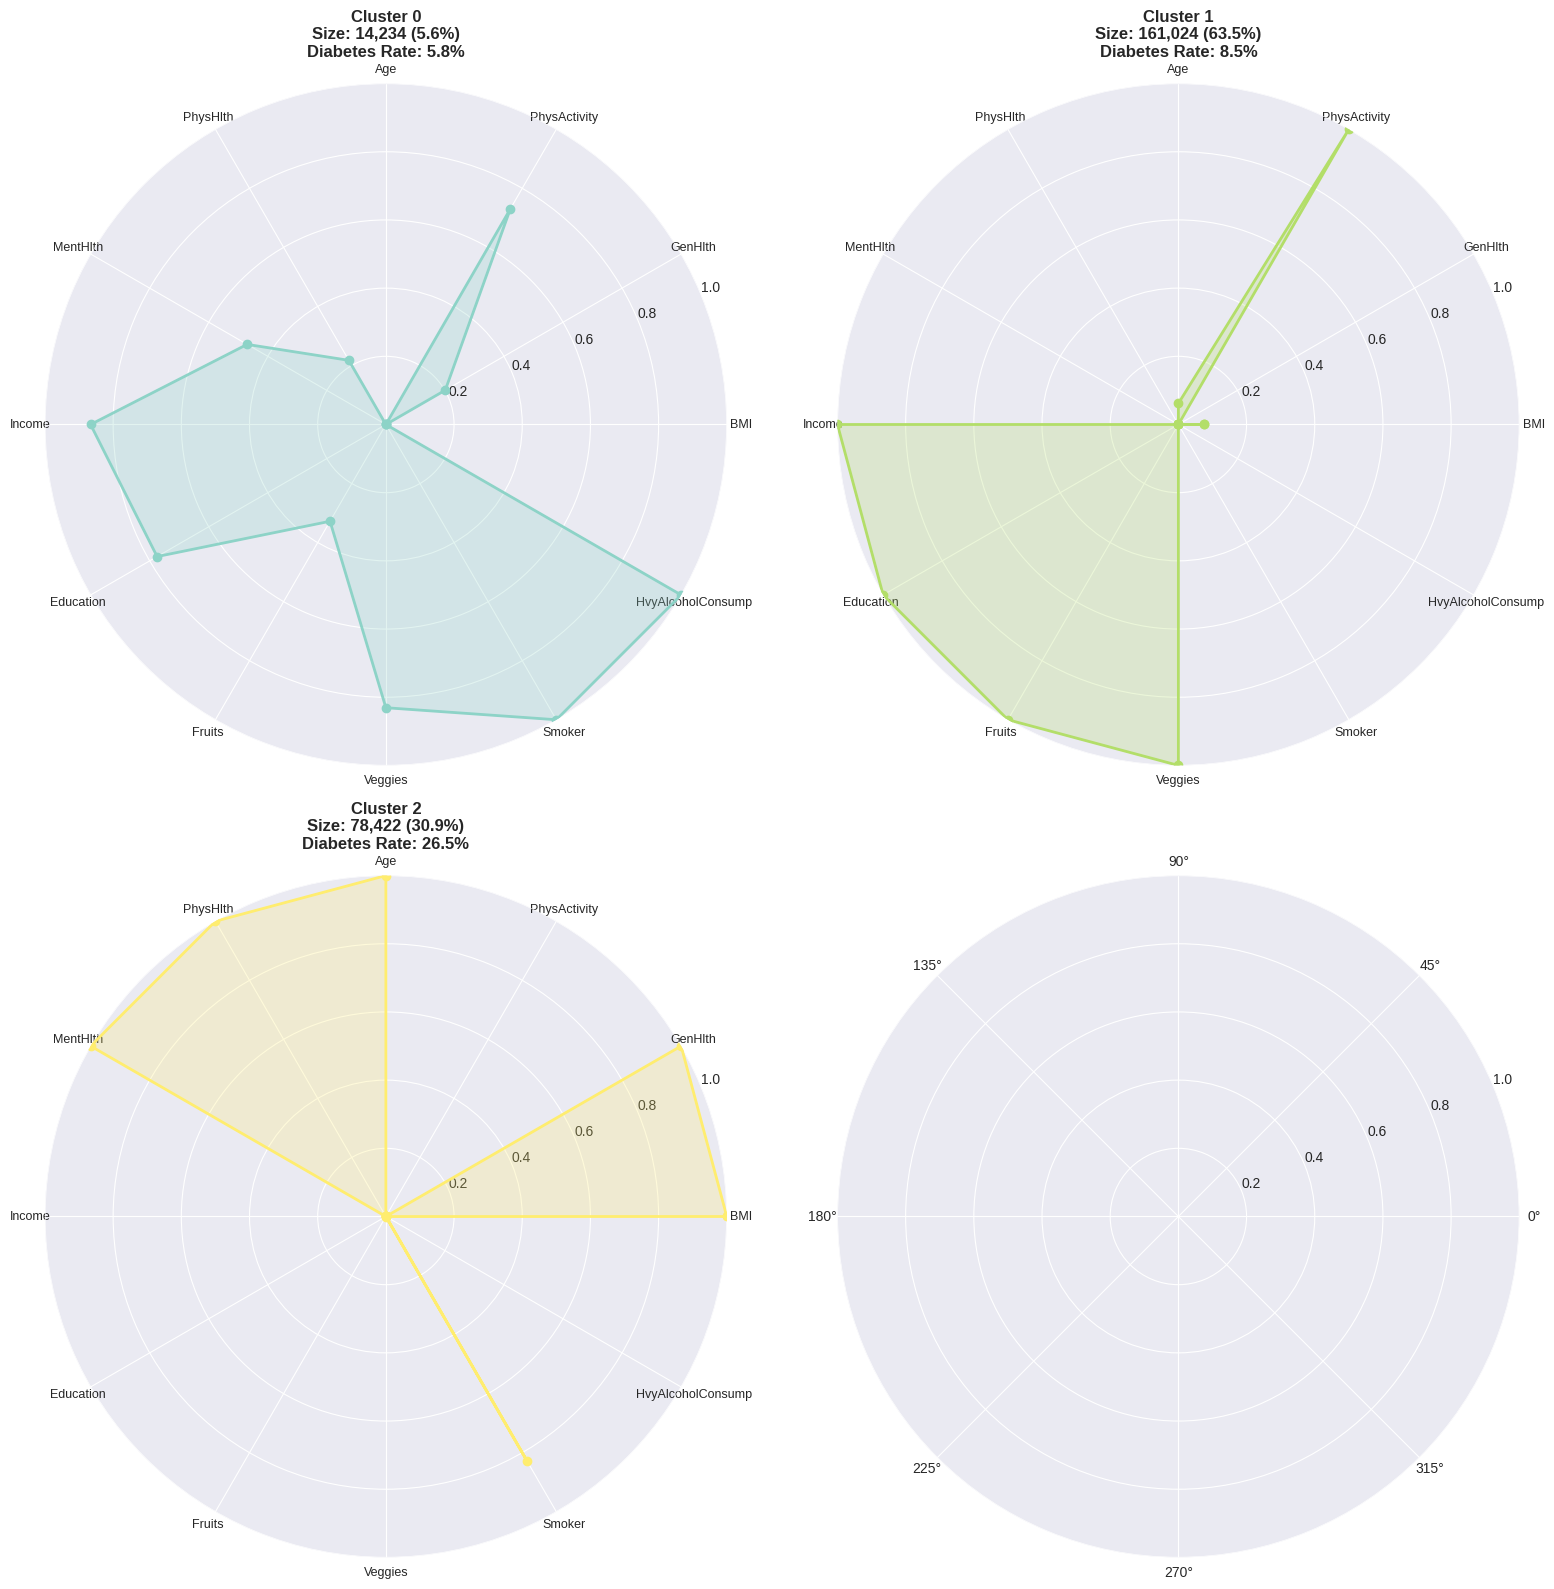

In [37]:
# Visualize Cluster Profiles
from math import pi

# Normalize cluster profiles for radar chart (0-1 scale)
cluster_profiles_norm = cluster_profiles.copy()
for col in cluster_profiles_norm.columns:
    min_val = cluster_profiles_norm[col].min()
    max_val = cluster_profiles_norm[col].max()
    if max_val > min_val:
        cluster_profiles_norm[col] = (cluster_profiles_norm[col] - min_val) / (max_val - min_val)
    else:
        cluster_profiles_norm[col] = 0.5

# Create radar chart
categories = list(cluster_profiles_norm.columns)
N = len(categories)

# Angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot
fig, axes = plt.subplots(2, 2, figsize=(16, 16), subplot_kw=dict(projection='polar'))
axes = axes.ravel()

colors_radar = plt.cm.Set3(np.linspace(0, 1, optimal_k))

for idx, cluster_id in enumerate(range(optimal_k)):
    if idx >= len(axes):
        break

    ax = axes[idx]

    # Get values for this cluster
    values = cluster_profiles_norm.iloc[cluster_id].values.tolist()
    values += values[:1]

    # Plot
    ax.plot(angles, values, 'o-', linewidth=2, color=colors_radar[cluster_id])
    ax.fill(angles, values, alpha=0.25, color=colors_radar[cluster_id])

    # Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=9)
    ax.set_ylim(0, 1)

    # Title with cluster info
    cluster_size = cluster_counts[cluster_id]
    diabetes_rate = diabetes_by_cluster.loc[cluster_id, 'Diabetes_Rate']
    ax.set_title(f'Cluster {cluster_id}\n'
                f'Size: {cluster_size:,} ({cluster_size/len(cluster_labels)*100:.1f}%)\n'
                f'Diabetes Rate: {diabetes_rate:.1f}%',
                fontsize=12, fontweight='bold', pad=20)

    ax.grid(True)

plt.tight_layout()
plt.show()

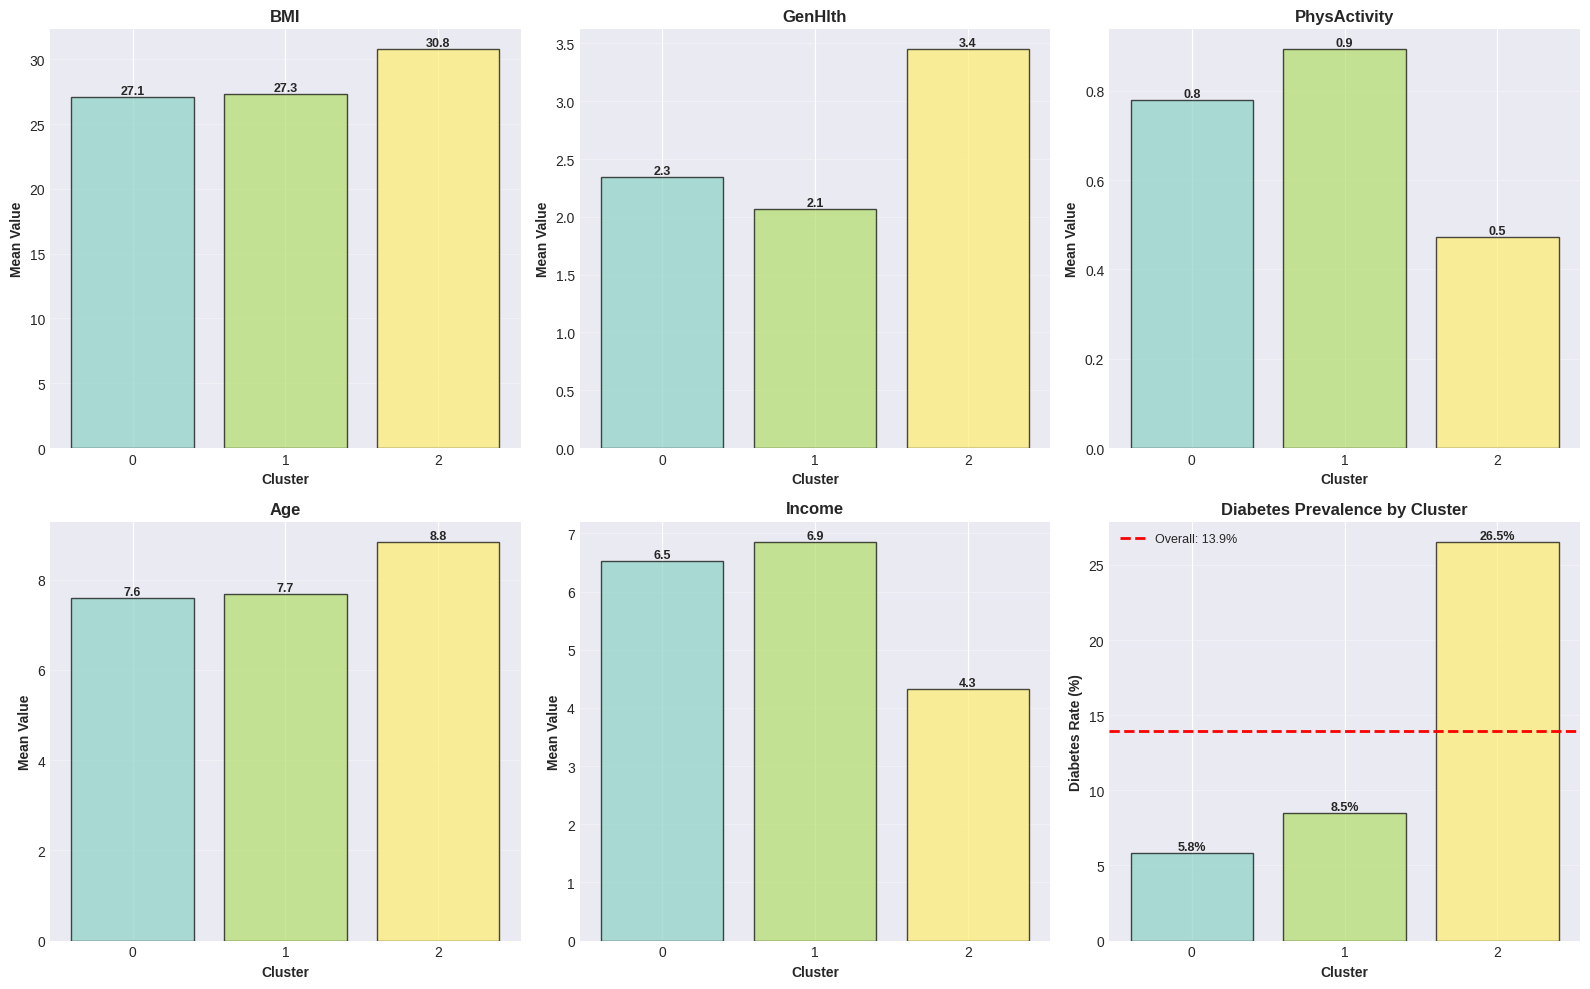

In [38]:
# Create bar chart comparison for key features
key_features = ['BMI', 'GenHlth', 'PhysActivity', 'Age', 'Income']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if idx >= len(axes) - 1:  # Save last subplot for diabetes rate
        break

    # Get values for each cluster
    values = [cluster_profiles.loc[c, feature] for c in range(optimal_k)]

    # Plot
    bars = axes[idx].bar(range(optimal_k), values, color=colors,
                        alpha=0.7, edgecolor='black')
    axes[idx].set_xlabel('Cluster', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Mean Value', fontsize=10, fontweight='bold')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(range(optimal_k))
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}',
                      ha='center', va='bottom', fontsize=9, fontweight='bold')

# Last plot: Diabetes prevalence
diabetes_rates = diabetes_by_cluster['Diabetes_Rate'].values
bars = axes[5].bar(range(optimal_k), diabetes_rates, color=colors,
                   alpha=0.7, edgecolor='black')
axes[5].axhline(y=overall_diabetes_rate, color='red', linestyle='--',
               linewidth=2, label=f'Overall: {overall_diabetes_rate:.1f}%')
axes[5].set_xlabel('Cluster', fontsize=10, fontweight='bold')
axes[5].set_ylabel('Diabetes Rate (%)', fontsize=10, fontweight='bold')
axes[5].set_title('Diabetes Prevalence by Cluster', fontsize=12, fontweight='bold')
axes[5].set_xticks(range(optimal_k))
axes[5].legend(fontsize=9)
axes[5].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[5].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [39]:
# Behavioral Segmentation Interpretation
print("=" * 80)
print("BEHAVIORAL SEGMENT INTERPRETATION")
print("=" * 80)

# This will be filled based on actual cluster characteristics
# Below is a template - actual names should reflect the data

cluster_interpretations = {}

for cluster_id in range(optimal_k):
    profile = cluster_profiles.loc[cluster_id]
    diabetes_rate = diabetes_by_cluster.loc[cluster_id, 'Diabetes_Rate']
    size = diabetes_by_cluster.loc[cluster_id, 'Total']

    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*80}")

    # Determine cluster name based on characteristics
    # This is an example - actual interpretation depends on the data

    characteristics = []

    # BMI analysis
    if profile['BMI'] > 30:
        characteristics.append("High BMI (Obese)")
    elif profile['BMI'] > 25:
        characteristics.append("Moderate BMI (Overweight)")
    else:
        characteristics.append("Normal BMI")

    # Health status
    if profile['GenHlth'] > 3:
        characteristics.append("Poor General Health")
    elif profile['GenHlth'] > 2:
        characteristics.append("Fair General Health")
    else:
        characteristics.append("Good General Health")

    # Physical activity
    if profile['PhysActivity'] < 0.3:
        characteristics.append("Low Physical Activity")
    elif profile['PhysActivity'] < 0.7:
        characteristics.append("Moderate Physical Activity")
    else:
        characteristics.append("High Physical Activity")

    # Age
    if profile['Age'] > 9:
        characteristics.append("Older Adults (65+)")
    elif profile['Age'] > 6:
        characteristics.append("Middle-Aged (45-64)")
    else:
        characteristics.append("Younger Adults (18-44)")

    print(f"\nCluster Size: {size:,} ({size/len(cluster_labels)*100:.1f}% of population)")
    print(f"Diabetes Prevalence: {diabetes_rate:.1f}%")
    print(f"\nKey Characteristics:")
    for char in characteristics:
        print(f"  • {char}")

    print(f"\nDetailed Profile:")
    print(f"  BMI: {profile['BMI']:.1f}")
    print(f"  General Health (1-5): {profile['GenHlth']:.1f}")
    print(f"  Physical Activity: {profile['PhysActivity']:.2f}")
    print(f"  Age Category: {profile['Age']:.1f}")
    print(f"  Income Level: {profile['Income']:.1f}")
    print(f"  Education Level: {profile['Education']:.1f}")
    print(f"  Physical Health (days): {profile['PhysHlth']:.1f}")
    print(f"  Mental Health (days): {profile['MentHlth']:.1f}")

    # Store interpretation
    cluster_interpretations[cluster_id] = {
        'characteristics': characteristics,
        'diabetes_rate': diabetes_rate,
        'size': size
    }

BEHAVIORAL SEGMENT INTERPRETATION

CLUSTER 0

Cluster Size: 14,234 (5.6% of population)
Diabetes Prevalence: 5.8%

Key Characteristics:
  • Moderate BMI (Overweight)
  • Fair General Health
  • High Physical Activity
  • Middle-Aged (45-64)

Detailed Profile:
  BMI: 27.1
  General Health (1-5): 2.3
  Physical Activity: 0.78
  Age Category: 7.6
  Income Level: 6.5
  Education Level: 5.2
  Physical Health (days): 3.3
  Mental Health (days): 3.9

CLUSTER 1

Cluster Size: 161,024 (63.5% of population)
Diabetes Prevalence: 8.5%

Key Characteristics:
  • Moderate BMI (Overweight)
  • Fair General Health
  • High Physical Activity
  • Middle-Aged (45-64)

Detailed Profile:
  BMI: 27.3
  General Health (1-5): 2.1
  Physical Activity: 0.89
  Age Category: 7.7
  Income Level: 6.9
  Education Level: 5.4
  Physical Health (days): 1.2
  Mental Health (days): 1.4

CLUSTER 2

Cluster Size: 78,422 (30.9% of population)
Diabetes Prevalence: 26.5%

Key Characteristics:
  • High BMI (Obese)
  • Poor Gene

In [40]:
# Healthcare Intervention Strategies
print("\n" + "=" * 80)
print("TARGETED HEALTHCARE INTERVENTION STRATEGIES")
print("=" * 80)

for cluster_id in range(optimal_k):
    profile = cluster_profiles.loc[cluster_id]
    diabetes_rate = diabetes_by_cluster.loc[cluster_id, 'Diabetes_Rate']

    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} - INTERVENTION STRATEGY")
    print(f"{'='*80}")

    # Determine risk level
    if diabetes_rate > overall_diabetes_rate * 1.5:
        risk_level = "HIGH RISK"
        priority = "URGENT"
    elif diabetes_rate > overall_diabetes_rate:
        risk_level = "MODERATE RISK"
        priority = "IMPORTANT"
    else:
        risk_level = "LOW RISK"
        priority = "PREVENTIVE"

    print(f"\nRisk Level: {risk_level}")
    print(f"Priority: {priority}")
    print(f"Diabetes Rate: {diabetes_rate:.1f}% (Overall: {overall_diabetes_rate:.1f}%)")

    print(f"\n📋 Recommended Interventions:")

    # BMI-based interventions
    if profile['BMI'] > 30:
        print("  • Intensive weight management program")
        print("  • Nutritional counseling")
        print("  • Consider medical weight loss interventions")
    elif profile['BMI'] > 25:
        print("  • Moderate weight management support")
        print("  • Dietary guidance")

    # Physical activity interventions
    if profile['PhysActivity'] < 0.5:
        print("  • Structured exercise program")
        print("  • Community fitness initiatives")
        print("  • Low-impact activity options for beginners")

    # Health status interventions
    if profile['GenHlth'] > 3:
        print("  • Regular health monitoring")
        print("  • Chronic disease management")
        print("  • Increase primary care visits")

    # Mental health interventions
    if profile['MentHlth'] > 7:
        print("  • Mental health support services")
        print("  • Stress management programs")
        print("  • Consider behavioral health integration")

    # Diet interventions
    if profile['Fruits'] < 0.5 or profile['Veggies'] < 0.5:
        print("  • Nutrition education")
        print("  • Healthy eating workshops")
        print("  • Access to fresh produce programs")

    # Screening recommendations
    if diabetes_rate > overall_diabetes_rate:
        print("  • Enhanced diabetes screening frequency")
        print("  • HbA1c testing every 6 months")
        print("  • Blood glucose monitoring education")

    # Resource allocation
    print(f"\n Resource Allocation:")
    cluster_size = diabetes_by_cluster.loc[cluster_id, 'Total']
    if risk_level == "HIGH RISK":
        print(f"  • Allocate 40-50% of intervention budget")
        print(f"  • Intensive case management")
        print(f"  • Estimated reach: {cluster_size:,} individuals")
    elif risk_level == "MODERATE RISK":
        print(f"  • Allocate 30-40% of intervention budget")
        print(f"  • Group-based interventions")
        print(f"  • Estimated reach: {cluster_size:,} individuals")
    else:
        print(f"  • Allocate 10-20% of intervention budget")
        print(f"  • Preventive education and awareness")
        print(f"  • Estimated reach: {cluster_size:,} individuals")


TARGETED HEALTHCARE INTERVENTION STRATEGIES

CLUSTER 0 - INTERVENTION STRATEGY

Risk Level: LOW RISK
Priority: PREVENTIVE
Diabetes Rate: 5.8% (Overall: 13.9%)

📋 Recommended Interventions:
  • Moderate weight management support
  • Dietary guidance

 Resource Allocation:
  • Allocate 10-20% of intervention budget
  • Preventive education and awareness
  • Estimated reach: 14,234 individuals

CLUSTER 1 - INTERVENTION STRATEGY

Risk Level: LOW RISK
Priority: PREVENTIVE
Diabetes Rate: 8.5% (Overall: 13.9%)

📋 Recommended Interventions:
  • Moderate weight management support
  • Dietary guidance

 Resource Allocation:
  • Allocate 10-20% of intervention budget
  • Preventive education and awareness
  • Estimated reach: 161,024 individuals

CLUSTER 2 - INTERVENTION STRATEGY

Risk Level: HIGH RISK
Priority: URGENT
Diabetes Rate: 26.5% (Overall: 13.9%)

📋 Recommended Interventions:
  • Intensive weight management program
  • Nutritional counseling
  • Consider medical weight loss interventio